Candidate Number: 277229

## Trivisio IMU - Colibri Wireless Report

This report has been created to analyse the data provided by the company Trivisio, regarding their physical activity monitor. The main purpose of this analysis is to find out possible future improvements that can be added to the product to generate a better user experience, and in return, better profits.

The data collection was done by tracking the information gathered by Trivisio´s inertial measurement unit (IMU), Colibri Wireless, in 9 subjects that performed different types of activities.The data collectors have informed me that each subject also had a heart monitor, which kept track of their heart rate throughout the experiment. 

The data from this experiment was given in 9 different files, with additional PDFs files providing information about the product, the type of data and the subjects, which have been used in this report and will be explained as necessary. 

The first step in this report, is to clean and wrangle the data, and to do so, all 9 files must be added into one data frame. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



The product is equipped with different sensors that measure temperature, movement and orientation of hands, chest and ankles.

Following that information, I have named the columns of the data frame, to be as informative as possible, considering the similarities between all the different types of measurements. 

Since the data has been given in separate files, I found that the most straightforward way to merge them was to create the structure of a complete data frame, that will then be filled with each subject´s file´s data.

In [2]:
columnas=['timestamp','activityID', 'bpm',
         #hand
         'IMU_hand_temp', 'IMU_hand_acceleration_scale16g_1',  'IMU_hand_acceleration_scale16g_2',
         'IMU_hand_acceleration_scale16g_3',  'IMU_hand_acceleration_scale6g_1',
         'IMU_hand_acceleration_scale6g_2',  'IMU_hand_acceleration_scale6g_3',
         'IMU_hand_gyroscope_1','IMU_hand_gyroscope_2','IMU_hand_gyroscope_3', 
         'IMU_hand_magnetometer_1','IMU_hand_magnetometer_2','IMU_hand_magnetometer_3',
         'IMU_hand_orientation_1',  'IMU_hand_orientation_2','IMU_hand_orientation_3', 
         'IMU_hand_orientation_4',
         #chest
         'IMU_chest_temp','IMU_chest_acceleration_scale16g_1', 'IMU_chest_acceleration_scale16g_2',
         'IMU_chest_acceleration_scale16g_3', 'IMU_chest_acceleration_scale6g_1',
         'IMU_chest_acceleration_scale6g_2', 'IMU_chest_acceleration_scale6g_3',
         'IMU_chest_gyroscope_1','IMU_chest_gyroscope_2','IMU_chest_gyroscope_3',
         'IMU_chest_magnetometer_1','IMU_chest_magnetometer_2','IMU_chest_magnetometer_3',
         'IMU_chest_orientation_1', 'IMU_chest_orientation_2','IMU_chest_orientation_3',
         'IMU_chest_orientation_4',
         #ankle
         'IMU_ankle_temp','IMU_ankle_acceleration_scale16g_1', 'IMU_ankle_acceleration_scale16g_2',
         'IMU_ankle_acceleration_scale16g_3', 'IMU_ankle_acceleration_scale6g_1',
         'IMU_ankle_acceleration_scale6g_2', 'IMU_ankle_acceleration_scale6g_3',
         'IMU_ankle_gyroscope_1','IMU_ankle_gyroscope_2','IMU_ankle_gyroscope_3',
         'IMU_ankle_magnetometer_1','IMU_ankle_magnetometer_2','IMU_ankle_magnetometer_3',
         'IMU_ankle_orientation_1', 'IMU_ankle_orientation_2','IMU_ankle_orientation_3',
         'IMU_ankle_orientation_4',]
df_complete = pd.DataFrame(columns=columnas)


file_path1 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject101.dat'
file_path2 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject102.dat'
file_path3 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject103.dat'
file_path4 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject104.dat'
file_path5 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject105.dat'
file_path6 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject106.dat'
file_path7 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject107.dat'
file_path8 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject108.dat'
file_path9 = 'C://Users//Flor//Downloads//DS//Final//Dataset//Dataset//Protocol//subject109.dat'

data1 = pd.read_csv(file_path1, names=columnas, delimiter=" ")
data1.insert(loc=0, column='SubjectID', value=101)
data2 = pd.read_csv(file_path2, names=columnas, delimiter=" ")
data2.insert(loc=0, column='SubjectID', value=102)
data3 = pd.read_csv(file_path3, names=columnas, delimiter=" ")
data3.insert(loc=0, column='SubjectID', value=103)
data4 = pd.read_csv(file_path4, names=columnas, delimiter=" ")
data4.insert(loc=0, column='SubjectID', value=104)
data5 = pd.read_csv(file_path5, names=columnas, delimiter=" ")
data5.insert(loc=0, column='SubjectID', value=105)
data6 = pd.read_csv(file_path6, names=columnas, delimiter=" ")
data6.insert(loc=0, column='SubjectID', value=106)
data7 = pd.read_csv(file_path7, names=columnas, delimiter=" ")
data7.insert(loc=0, column='SubjectID', value=107)
data8 = pd.read_csv(file_path8, names=columnas, delimiter=" ")
data8.insert(loc=0, column='SubjectID', value=108)
data9 = pd.read_csv(file_path9, names=columnas, delimiter=" ")
data9.insert(loc=0, column='SubjectID', value=109)


df_complete = pd.concat([df_complete, data1,data2,data3,data4,data5,data6,data7,data8,data9], 
                        ignore_index=True) 




Now, **df_complete** has the information that was provided to be of all 9 individuals. One thing to point out, there are a significant number of ´bpm´ (beats per minute, meaning heart rate) cells empty, which is something that needs to be resolved somehow. 

In [3]:
df_complete

,timestamp,activityID,bpm,IMU_hand_temp,IMU_hand_acceleration_scale16g_1,IMU_hand_acceleration_scale16g_2,IMU_hand_acceleration_scale16g_3,IMU_hand_acceleration_scale6g_1,IMU_hand_acceleration_scale6g_2,IMU_hand_acceleration_scale6g_3,...,IMU_ankle_gyroscope_2,IMU_ankle_gyroscope_3,IMU_ankle_magnetometer_1,IMU_ankle_magnetometer_2,IMU_ankle_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,SubjectID
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1.000000,0.000000,0.000000,0.000000,101.0
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1.000000,0.000000,0.000000,0.000000,101.0
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1.000000,0.000000,0.000000,0.000000,101.0
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1.000000,0.000000,0.000000,0.000000,101.0
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1.000000,0.000000,0.000000,0.000000,101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,0.598531,0.033615,0.799791,-0.031075,109.0
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,-0.027006,-0.089808,-45.7474,3.54453,0.108583,0.598428,0.033012,0.799933,-0.030018,109.0
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,-0.038024,-0.064709,-46.3997,4.22078,0.105504,0.598233,0.033172,0.800095,-0.029416,109.0
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,-0.025796,-0.064357,-46.5282,4.48593,0.530240,0.598116,0.033427,0.800180,-0.029208,109.0


The data collector mentioned that the times in between the different physical activities, such as waiting time, walking to different rooms and travel time, were marked with a 0 value in the ActivityID column. Furthermore, two sensors have similar functions but different accuracy, which is why they advised disregarding the less accurate measurements since it wasn’t precisely calibrated. Finally, there was a note in the columns marked as orientation, which mentioned that they were not to be used in this analysis. 

As a result of all these notes, I had to remove all rows where ActivityID is 0, and all columns that utilized orientation and acceleration over 6g. 


In [4]:
df_complete = df_complete[df_complete['activityID'] != 0]

In [5]:
df_complete = df_complete.drop(['IMU_hand_orientation_1',  'IMU_hand_orientation_2',
              'IMU_hand_orientation_3', 'IMU_hand_orientation_4',
              'IMU_chest_orientation_1', 'IMU_chest_orientation_2',
              'IMU_chest_orientation_3', 'IMU_chest_orientation_4',
              'IMU_ankle_orientation_1', 'IMU_ankle_orientation_2',
              'IMU_ankle_orientation_3', 'IMU_ankle_orientation_4',
              'IMU_hand_acceleration_scale6g_1','IMU_hand_acceleration_scale6g_2',
              'IMU_hand_acceleration_scale6g_3','IMU_chest_acceleration_scale6g_1',
              'IMU_chest_acceleration_scale6g_2','IMU_chest_acceleration_scale6g_3',
              'IMU_ankle_acceleration_scale6g_1','IMU_ankle_acceleration_scale6g_2',
              'IMU_ankle_acceleration_scale6g_3'
             ], axis=1)

In [6]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1942872 entries, 2928 to 2872019
Data columns (total 34 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   timestamp                          float64
 1   activityID                         object 
 2   bpm                                float64
 3   IMU_hand_temp                      float64
 4   IMU_hand_acceleration_scale16g_1   float64
 5   IMU_hand_acceleration_scale16g_2   float64
 6   IMU_hand_acceleration_scale16g_3   float64
 7   IMU_hand_gyroscope_1               float64
 8   IMU_hand_gyroscope_2               float64
 9   IMU_hand_gyroscope_3               float64
 10  IMU_hand_magnetometer_1            float64
 11  IMU_hand_magnetometer_2            float64
 12  IMU_hand_magnetometer_3            float64
 13  IMU_chest_temp                     float64
 14  IMU_chest_acceleration_scale16g_1  float64
 15  IMU_chest_acceleration_scale16g_2  float64
 16  IMU_chest_accelerati

The column **ActivityID** is currently only showing numbers, which don’t mean a lot when trying to give meaning to the other measurements. That’s why I created an **activity_dictionary**, which is, in turn, used to fill out a new column in the data frame, called **activityID_legend**

The idea behind this column is to give a clearer perspective and to help with the interpretation of the data representations. 

In [7]:
activity_dictonary = {
    1: 'lying',
    2: 'sitting',
    3: 'standing',
    4: 'walking',
    5: 'running',
    6: 'cycling',
    7: 'nordic walking',
    9: 'watching tv',
    10: 'computer work',
    11: 'car driving',
    12: 'ascending stairs',
    13: 'descending stairs',
    16: 'vacuum cleaning',
    17: 'ironing',
    18: 'folding laundry',
    19: 'house cleaning',
    20: 'playing soccer',
    24: 'rope jumping'
    
}

df_complete['activityID_legend'] = df_complete['activityID'].map(activity_dictonary)

As I mentioned previously, several **bpm** empty values need to be addressed. However, we have 1942872 entries, and according to the following check on this column, there are 1765464 empty values in total.  Removing these empty values would not be wise, since it would mean removing most of our data. As an alternative, we could look into another column, that may help bring a different solution.

The column **timestamp**, which is our given measure of time in seconds, shows very small variations between rows. That means that there are several rows which belong to the same subject, while they are conducting the same activity, in a relatively small amount of time. I have decided that it is safe to consider that, because the variations between rows consist of approximately 0,1 seconds each, it's safe to fill up the **bpm** column with its nearer value available, belonging to the same subject and the same activity. 


In [8]:
df_complete['bpm'].isna().sum()

1765464

In [9]:
def rellenar_bpm(group):
    group['bpm'] = group['bpm'].ffill().bfill()
    return group

df_complete = df_complete.groupby(['activityID', 'SubjectID']).apply(rellenar_bpm)

After having extensively modified the data frame, it is important to make some checks, to see that everything is going according to plan. I'm checking the structure of the data frame again, double-checking that **activityID** does not present any 0 values and checking that there are no duplicate rows. 

In [10]:
df_complete['activityID'].unique()

array([1, 2, 3, 4, 5, 6, 7, 12, 13, 16, 17, 24], dtype=object)

In [11]:
df_complete.describe()

,timestamp,bpm,IMU_hand_temp,IMU_hand_acceleration_scale16g_1,IMU_hand_acceleration_scale16g_2,IMU_hand_acceleration_scale16g_3,IMU_hand_gyroscope_1,IMU_hand_gyroscope_2,IMU_hand_gyroscope_3,IMU_hand_magnetometer_1,...,IMU_ankle_acceleration_scale16g_1,IMU_ankle_acceleration_scale16g_2,IMU_ankle_acceleration_scale16g_3,IMU_ankle_gyroscope_1,IMU_ankle_gyroscope_2,IMU_ankle_gyroscope_3,IMU_ankle_magnetometer_1,IMU_ankle_magnetometer_2,IMU_ankle_magnetometer_3,SubjectID
count,1.942872e+06,1.942871e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,1.931748e+06,...,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.934365e+06,1.942872e+06
mean,1.705202e+03,1.074847e+02,3.275752e+01,-4.938311e+00,3.580308e+00,3.609347e+00,6.470148e-04,3.990067e-02,-2.219538e-03,2.105412e+01,...,9.404517e+00,-1.555721e-01,-2.592149e+00,1.062149e-02,-3.676710e-02,7.725809e-03,-3.156858e+01,1.414712e+00,1.724289e+01,1.045664e+02
std,1.093463e+03,2.699077e+01,1.791983e+00,6.231142e+00,6.887907e+00,3.960176e+00,1.328472e+00,9.542155e-01,1.595544e+00,2.381242e+01,...,6.531695e+00,7.741951e+00,3.938341e+00,1.126987e+00,6.380790e-01,2.011906e+00,1.835626e+01,2.168850e+01,1.972172e+01,2.333052e+00
min,3.120000e+01,5.700000e+01,2.487500e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-2.813540e+01,-1.784950e+01,-1.426470e+01,-1.039410e+02,...,-1.550680e+02,-1.574430e+02,-1.589260e+02,-2.399500e+01,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.027160e+02,1.010000e+02
25%,7.445400e+02,8.600000e+01,3.168750e+01,-8.955800e+00,1.048068e+00,1.161655e+00,-3.768683e-01,-2.224115e-01,-3.798985e-01,4.752860e+00,...,8.425630e+00,-2.175540e+00,-3.811010e+00,-2.062960e-01,-1.063010e-01,-4.368720e-01,-4.170720e+01,-1.245170e+01,3.761730e+00,1.020000e+02
50%,1.480330e+03,1.040000e+02,3.318750e+01,-5.426670e+00,3.523155e+00,3.441330e+00,-6.076310e-03,5.905485e-03,-5.582015e-03,2.283745e+01,...,9.537770e+00,-2.907700e-01,-2.418770e+00,4.666780e-03,-3.971010e-03,-2.243400e-03,-3.397750e+01,8.009720e-01,1.875760e+01,1.050000e+02
75%,2.663610e+03,1.240000e+02,3.406250e+01,-9.430042e-01,6.454320e+00,6.538525e+00,3.323695e-01,2.655973e-01,3.648515e-01,3.929700e+01,...,1.028620e+01,1.780190e+00,-1.042100e+00,1.307210e-01,1.154390e-01,9.160350e-02,-1.787670e+01,1.785610e+01,3.120870e+01,1.070000e+02
max,4.245680e+03,2.020000e+02,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,2.641580e+01,2.307790e+01,1.433840e+01,1.375440e+02,...,1.572320e+02,1.572930e+02,1.588720e+02,1.742040e+01,1.358820e+01,1.652880e+01,9.155160e+01,9.424780e+01,1.469000e+02,1.090000e+02


In [12]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1942872 entries, (1, 101.0, 2928) to (24, 109.0, 2872019)
Data columns (total 35 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   timestamp                          float64
 1   activityID                         object 
 2   bpm                                float64
 3   IMU_hand_temp                      float64
 4   IMU_hand_acceleration_scale16g_1   float64
 5   IMU_hand_acceleration_scale16g_2   float64
 6   IMU_hand_acceleration_scale16g_3   float64
 7   IMU_hand_gyroscope_1               float64
 8   IMU_hand_gyroscope_2               float64
 9   IMU_hand_gyroscope_3               float64
 10  IMU_hand_magnetometer_1            float64
 11  IMU_hand_magnetometer_2            float64
 12  IMU_hand_magnetometer_3            float64
 13  IMU_chest_temp                     float64
 14  IMU_chest_acceleration_scale16g_1  float64
 15  IMU_chest_acceleration_scale16g_2  flo

In [13]:
duplicados = df_complete.duplicated().sum()
duplicados

0

In [14]:
df_complete

timestamp activityID    bpm  IMU_hand_temp  \
activityID SubjectID                                                       
1          101.0     2928         37.66          1  100.0         30.375   
                     2929         37.67          1  100.0         30.375   
                     2930         37.68          1  100.0         30.375   
                     2931         37.69          1  100.0         30.375   
                     2932         37.70          1  100.0         30.375   
...                                 ...        ...    ...            ...   
24         109.0     2872015      95.06         24  162.0         25.125   
                     2872016      95.07         24  162.0         25.125   
                     2872017      95.08         24  162.0         25.125   
                     2872018      95.09         24  162.0         25.125   
                     2872019      95.10         24  162.0         25.125   

                              IMU_hand_acceleration_scale16g_1  \
activityID SubjectID                                             
1          101.0     2928                              2.21530   
                     2929                              2.29196   
                     2930                              2.29090   
                     2931                              2.21800   
                     2932                              2.30106   
...                                                        ...   
24         109.0     2872015                           4.99466   
                     2872016                           5.02764   
                     2872017                           5.06409   
                     2872018                           5.13914   
                     2872019                           5.00812   

                              IMU_hand_acceleration_scale16g_2  \
activityID SubjectID                                             
1          101.0     2928                              8.27915   
                     2929                              7.67288   
                     2930                              7.14240   
                     2931                              7.14365   
                     2932                              7.25857   
...                                                        ...   
24         109.0     2872015                           6.01881   
                     2872016                           5.90369   
                     2872017                           5.71370   
                     2872018                           5.63724   
                     2872019                           5.40645   

                              IMU_hand_acceleration_scale16g_3  \
activityID SubjectID                                             
1          101.0     2928                              5.58753   
                     2929                              5.74467   
                     2930                              5.82342   
                     2931                              5.89930   
                     2932                              6.09259   
...                                                        ...   
24         109.0     2872015                           5.59830   
                     2872016                           5.48372   
                     2872017                           5.48491   
                     2872018                           5.48629   
                     2872019                           5.02326   

                              IMU_hand_gyroscope_1  IMU_hand_gyroscope_2  \
activityID SubjectID                                                       
1          101.0     2928                -0.004750              0.037579   
                     2929                -0.171710              0.025479   
                     2930                -0.238241              0.011214   
                     2931                -0.192912              0.019053   
        

We have already dealt with the NaN for **bpm**, but we have not checked to see if there are any in the rest of the columns. Since the accuracy of the measurements is very important to the data collector, I have decided to check for the percentage of NaNs present in each column.  

In [15]:
df_complete.isna().mean() * 100

timestamp                            0.000000
activityID                           0.000000
bpm                                  0.000051
IMU_hand_temp                        0.572554
IMU_hand_acceleration_scale16g_1     0.572554
IMU_hand_acceleration_scale16g_2     0.572554
IMU_hand_acceleration_scale16g_3     0.572554
IMU_hand_gyroscope_1                 0.572554
IMU_hand_gyroscope_2                 0.572554
IMU_hand_gyroscope_3                 0.572554
IMU_hand_magnetometer_1              0.572554
IMU_hand_magnetometer_2              0.572554
IMU_hand_magnetometer_3              0.572554
IMU_chest_temp                       0.124558
IMU_chest_acceleration_scale16g_1    0.124558
IMU_chest_acceleration_scale16g_2    0.124558
IMU_chest_acceleration_scale16g_3    0.124558
IMU_chest_gyroscope_1                0.124558
IMU_chest_gyroscope_2                0.124558
IMU_chest_gyroscope_3                0.124558
IMU_chest_magnetometer_1             0.124558
IMU_chest_magnetometer_2          

In [16]:
df_complete.dropna(inplace=True)

In [17]:
df_complete

timestamp activityID    bpm  IMU_hand_temp  \
activityID SubjectID                                                       
1          101.0     2928         37.66          1  100.0         30.375   
                     2929         37.67          1  100.0         30.375   
                     2930         37.68          1  100.0         30.375   
                     2931         37.69          1  100.0         30.375   
                     2932         37.70          1  100.0         30.375   
...                                 ...        ...    ...            ...   
24         109.0     2872015      95.06         24  162.0         25.125   
                     2872016      95.07         24  162.0         25.125   
                     2872017      95.08         24  162.0         25.125   
                     2872018      95.09         24  162.0         25.125   
                     2872019      95.10         24  162.0         25.125   

                              IMU_hand_acceleration_scale16g_1  \
activityID SubjectID                                             
1          101.0     2928                              2.21530   
                     2929                              2.29196   
                     2930                              2.29090   
                     2931                              2.21800   
                     2932                              2.30106   
...                                                        ...   
24         109.0     2872015                           4.99466   
                     2872016                           5.02764   
                     2872017                           5.06409   
                     2872018                           5.13914   
                     2872019                           5.00812   

                              IMU_hand_acceleration_scale16g_2  \
activityID SubjectID                                             
1          101.0     2928                              8.27915   
                     2929                              7.67288   
                     2930                              7.14240   
                     2931                              7.14365   
                     2932                              7.25857   
...                                                        ...   
24         109.0     2872015                           6.01881   
                     2872016                           5.90369   
                     2872017                           5.71370   
                     2872018                           5.63724   
                     2872019                           5.40645   

                              IMU_hand_acceleration_scale16g_3  \
activityID SubjectID                                             
1          101.0     2928                              5.58753   
                     2929                              5.74467   
                     2930                              5.82342   
                     2931                              5.89930   
                     2932                              6.09259   
...                                                        ...   
24         109.0     2872015                           5.59830   
                     2872016                           5.48372   
                     2872017                           5.48491   
                     2872018                           5.48629   
                     2872019                           5.02326   

                              IMU_hand_gyroscope_1  IMU_hand_gyroscope_2  \
activityID SubjectID                                                       
1          101.0     2928                -0.004750              0.037579   
                     2929                -0.171710              0.025479   
                     2930                -0.238241              0.011214   
                     2931                -0.192912              0.019053   
        

Since none of the percentages shown in the code above are significant, I decided to remove them all and preserve the accuracy of the remaining data. From this decision, the number of entries in the data goes from 1942872 rows to 1921430 rows, which should not compromise the integrity of the analysis. 

Now that the data has been sufficiently cleaned, I added a column to analyze the difference between the types of activities. To give value to this new column, I am utilizing the target values of heart rate for the type of exercise. According to research, the target heart rate for moderate exercise is 65%-75% of your maximum heart rate, and for intense exercise, it is 77%-93%. Another thing to point out is that the maximum heart rate of a person is determined by subtracting their age from 220. _This study is referenced at the end of this report if more information is needed._

Taking these factors into consideration, I have created a function that utilizes the information we have on each subject and calculates their maximum heart rate and their corresponding level of exercise per activity. Which is then included in a column denominated **exercise_intensity**.

The four values that this new column takes are **Resting**, **Moderate**, **Vigorous** and **Extreme**.  The following blocks of code detail how the calculations are done, and later on are applied into all rows, grouping by **SubjectID** and **activityID**, which in turn causes repetition in values, because the subjects are performing the same activity for a significant amount of time, which translates into several rows. 


In [18]:
#calculating each subject's maximum heart rate to check the level 
#of intensity each exercise represents. 

def maximosbpm(subject,bpm):
    subjects_age={
        '101.0':27,
        '102.0':25,
        '103.0':31,
        '104.0':24,
        '105.0':26,
        '106.0':26,
        '107.0':23,
        '108.0':32,
        '109.0':31,
    }
    edad=subjects_age.get(subject)
    maxbpm=220-edad
    moderate_min = maxbpm * 0.65
    vigorous_min = maxbpm * 0.77

    
    if moderate_min <= bpm < vigorous_min:
        return 'Moderate'
    elif bpm<moderate_min:
        return 'Resting'
    elif vigorous_min <= bpm < maxbpm:
        return 'Vigorous'
    elif bpm>=maxbpm:
        return 'Extreme'
    

In [19]:
def usar_maximosbpm(row):
    subject = str(row['SubjectID'])
    bpm = row['bpm']
    return maximosbpm(subject, bpm)

df_complete['exercise_intensity'] = df_complete.apply(usar_maximosbpm, axis=1)


In [20]:
df_complete

timestamp activityID    bpm  IMU_hand_temp  \
activityID SubjectID                                                       
1          101.0     2928         37.66          1  100.0         30.375   
                     2929         37.67          1  100.0         30.375   
                     2930         37.68          1  100.0         30.375   
                     2931         37.69          1  100.0         30.375   
                     2932         37.70          1  100.0         30.375   
...                                 ...        ...    ...            ...   
24         109.0     2872015      95.06         24  162.0         25.125   
                     2872016      95.07         24  162.0         25.125   
                     2872017      95.08         24  162.0         25.125   
                     2872018      95.09         24  162.0         25.125   
                     2872019      95.10         24  162.0         25.125   

                              IMU_hand_acceleration_scale16g_1  \
activityID SubjectID                                             
1          101.0     2928                              2.21530   
                     2929                              2.29196   
                     2930                              2.29090   
                     2931                              2.21800   
                     2932                              2.30106   
...                                                        ...   
24         109.0     2872015                           4.99466   
                     2872016                           5.02764   
                     2872017                           5.06409   
                     2872018                           5.13914   
                     2872019                           5.00812   

                              IMU_hand_acceleration_scale16g_2  \
activityID SubjectID                                             
1          101.0     2928                              8.27915   
                     2929                              7.67288   
                     2930                              7.14240   
                     2931                              7.14365   
                     2932                              7.25857   
...                                                        ...   
24         109.0     2872015                           6.01881   
                     2872016                           5.90369   
                     2872017                           5.71370   
                     2872018                           5.63724   
                     2872019                           5.40645   

                              IMU_hand_acceleration_scale16g_3  \
activityID SubjectID                                             
1          101.0     2928                              5.58753   
                     2929                              5.74467   
                     2930                              5.82342   
                     2931                              5.89930   
                     2932                              6.09259   
...                                                        ...   
24         109.0     2872015                           5.59830   
                     2872016                           5.48372   
                     2872017                           5.48491   
                     2872018                           5.48629   
                     2872019                           5.02326   

                              IMU_hand_gyroscope_1  IMU_hand_gyroscope_2  \
activityID SubjectID                                                       
1          101.0     2928                -0.004750              0.037579   
                     2929                -0.171710              0.025479   
                     2930                -0.238241              0.011214   
                     2931                -0.192912              0.019053   
        

As a next step in the exploration of this dataset, I'm calculating the mean value of all columns that are taking measurements of similar factors. This is done in the hopes of clarifying the data for further analysis. 

That is why I’m creating a new data frame with new columns, for acceleration, gyroscope and magnetometer for the three body parts, hand, chest and ankle, taking the mean of all the values provided by the data collector.

In [21]:
df_medias=df_complete.select_dtypes(include=[np.number])
df_medias['mean_hand_acceleration'] = df_medias[['IMU_hand_acceleration_scale16g_1', 
                                      'IMU_hand_acceleration_scale16g_2', 
                                      'IMU_hand_acceleration_scale16g_3']].mean(axis=1)

df_medias['mean_ankle_acceleration'] = df_medias[['IMU_ankle_acceleration_scale16g_1', 
                                      'IMU_ankle_acceleration_scale16g_2', 
                                      'IMU_ankle_acceleration_scale16g_3']].mean(axis=1)

df_medias['mean_chest_acceleration'] = df_medias[['IMU_chest_acceleration_scale16g_1', 
                                      'IMU_chest_acceleration_scale16g_2', 
                                      'IMU_chest_acceleration_scale16g_3']].mean(axis=1)

df_medias['mean_hand_gyroscope'] = df_medias[['IMU_hand_gyroscope_1',
                                              'IMU_hand_gyroscope_2',
                                              'IMU_hand_gyroscope_3']].mean(axis=1)

df_medias['mean_ankle_gyroscope'] = df_medias[['IMU_ankle_gyroscope_1',
                                              'IMU_ankle_gyroscope_2',
                                              'IMU_ankle_gyroscope_3']].mean(axis=1)

df_medias['mean_chest_gyroscope'] = df_medias[['IMU_chest_gyroscope_1',
                                              'IMU_chest_gyroscope_2',
                                              'IMU_chest_gyroscope_3']].mean(axis=1)

df_medias['mean_hand_magnetometer'] = df_medias[['IMU_hand_magnetometer_1',
                                               'IMU_hand_magnetometer_2',
                                               'IMU_hand_magnetometer_3']].mean(axis=1)

df_medias['mean_ankle_magnetometer'] = df_medias[['IMU_ankle_magnetometer_1',
                                               'IMU_ankle_magnetometer_2',
                                               'IMU_ankle_magnetometer_3']].mean(axis=1)

df_medias['mean_chest_magnetometer'] = df_medias[['IMU_chest_magnetometer_1',
                                               'IMU_chest_magnetometer_2',
                                               'IMU_chest_magnetometer_3']].mean(axis=1)

df_medias['activityID']=df_complete['activityID']
df_medias['exercise_intensity']=df_complete['exercise_intensity']


In [22]:
df_medias

timestamp    bpm  IMU_hand_temp  \
activityID SubjectID                                            
1          101.0     2928         37.66  100.0         30.375   
                     2929         37.67  100.0         30.375   
                     2930         37.68  100.0         30.375   
                     2931         37.69  100.0         30.375   
                     2932         37.70  100.0         30.375   
...                                 ...    ...            ...   
24         109.0     2872015      95.06  162.0         25.125   
                     2872016      95.07  162.0         25.125   
                     2872017      95.08  162.0         25.125   
                     2872018      95.09  162.0         25.125   
                     2872019      95.10  162.0         25.125   

                              IMU_hand_acceleration_scale16g_1  \
activityID SubjectID                                             
1          101.0     2928                              2.21530   
                     2929                              2.29196   
                     2930                              2.29090   
                     2931                              2.21800   
                     2932                              2.30106   
...                                                        ...   
24         109.0     2872015                           4.99466   
                     2872016                           5.02764   
                     2872017                           5.06409   
                     2872018                           5.13914   
                     2872019                           5.00812   

                              IMU_hand_acceleration_scale16g_2  \
activityID SubjectID                                             
1          101.0     2928                              8.27915   
                     2929                              7.67288   
                     2930                              7.14240   
                     2931                              7.14365   
                     2932                              7.25857   
...                                                        ...   
24         109.0     2872015                           6.01881   
                     2872016                           5.90369   
                     2872017                           5.71370   
                     2872018                           5.63724   
                     2872019                           5.40645   

                              IMU_hand_acceleration_scale16g_3  \
activityID SubjectID                                             
1          101.0     2928                              5.58753   
                     2929                              5.74467   
                     2930                              5.82342   
                     2931                              5.89930   
                     2932                              6.09259   
...                                                        ...   
24         109.0     2872015                           5.59830   
                     2872016                           5.48372   
                     2872017                           5.48491   
                     2872018                           5.48629   
                     2872019                           5.02326   

                              IMU_hand_gyroscope_1  IMU_hand_gyroscope_2  \
activityID SubjectID                                                       
1          101.0     2928                -0.004750              0.037579   
                     2929                -0.171710              0.025479   
                     2930                -0.238241              0.011214   
                     2931                -0.192912              0.019053   
                     2932                -0.069961             -0.018328   
...                                            ...                   ...   

To further analyze what each subject goes through during each activity, I calculated the time difference between the first and the last timestamp for each activity. This means that our new data frame has the total time that each person took to perform each activity, in the column **time_difference**. It's important to note that this column has a similar structure to column **exercise_intensity**, in the sense that the value will be repeated per subject per activity since it is taking into account a large number of rows.  

In [23]:
df_medias.reset_index(drop=True, inplace=True)
def calculo_time_diff(group):
    return group['timestamp'].max() - group['timestamp'].min()

time_diffs = df_medias.groupby(['SubjectID', 'activityID']).apply(calculo_time_diff).reset_index()
time_diffs.rename(columns={0: 'time_difference'}, inplace=True)

df_medias = pd.merge(df_medias, time_diffs, on=['SubjectID', 'activityID'], how='left')


In [24]:
df_medias

,timestamp,bpm,IMU_hand_temp,IMU_hand_acceleration_scale16g_1,IMU_hand_acceleration_scale16g_2,IMU_hand_acceleration_scale16g_3,IMU_hand_gyroscope_1,IMU_hand_gyroscope_2,IMU_hand_gyroscope_3,IMU_hand_magnetometer_1,...,mean_chest_acceleration,mean_hand_gyroscope,mean_ankle_gyroscope,mean_chest_gyroscope,mean_hand_magnetometer,mean_ankle_magnetometer,mean_chest_magnetometer,activityID,exercise_intensity,time_difference
0,37.66,100.0,30.375,2.21530,8.27915,5.58753,-0.004750,0.037579,-0.011145,8.93200,...,2.707567,0.007228,-0.007684,0.000145,-26.325367,-52.113767,-1.962178,1,Resting,271.86
1,37.67,100.0,30.375,2.29196,7.67288,5.74467,-0.171710,0.025479,-0.009538,9.58300,...,2.733360,-0.051923,0.009278,-0.021601,-26.428167,-51.858967,-2.020103,1,Resting,271.86
2,37.68,100.0,30.375,2.29090,7.14240,5.82342,-0.238241,0.011214,0.000831,9.05516,...,2.703949,-0.075399,-0.030899,-0.003142,-25.951613,-51.578933,-2.079840,1,Resting,271.86
3,37.69,100.0,30.375,2.21800,7.14365,5.89930,-0.192912,0.019053,0.013374,9.92698,...,2.744582,-0.053495,-0.008136,-0.035405,-26.023973,-51.915767,-2.057705,1,Resting,271.86
4,37.70,100.0,30.375,2.30106,7.25857,6.09259,-0.069961,-0.018328,0.004582,9.15626,...,2.796648,-0.027902,-0.017951,-0.017464,-26.037313,-51.737067,-2.441961,1,Resting,271.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921425,95.06,162.0,25.125,4.99466,6.01881,5.59830,-0.289166,-0.110170,0.238570,-4.79353,...,2.304086,-0.053589,0.004761,-0.072864,-23.730043,-15.595791,3.486200,24,Vigorous,63.90
1921426,95.07,162.0,25.125,5.02764,5.90369,5.48372,-0.275411,-0.128358,0.267409,-4.54101,...,2.253289,-0.045453,0.003369,-0.061935,-23.828237,-15.437418,3.469400,24,Vigorous,63.90
1921427,95.08,162.0,25.125,5.06409,5.71370,5.48491,-0.289885,-0.126548,0.281483,-4.17401,...,2.316360,-0.044983,-0.018141,-0.017922,-23.496437,-15.400991,3.687233,24,Vigorous,63.90
1921428,95.09,162.0,25.125,5.13914,5.63724,5.48629,-0.234417,-0.101485,0.275497,-4.66091,...,2.314066,-0.020135,-0.023868,-0.011660,-23.992003,-15.264915,3.214000,24,Vigorous,63.90


Since these new columns were calculated using the original data, we must remove the original columns so that we are not duplicating the information. That is why this second data frame must not have the first measurements for hands, chest and ankles dedicated to acceleration, gyroscope and magnetometer, and it must also not have the **timestamp** column, since it has been replaced by the **time_difference** column.

In [25]:
df_medias = df_medias.drop(['IMU_hand_acceleration_scale16g_1',
                            'IMU_hand_acceleration_scale16g_2', 
                            'IMU_hand_acceleration_scale16g_3',
                            'IMU_ankle_acceleration_scale16g_1', 
                            'IMU_ankle_acceleration_scale16g_2', 
                            'IMU_ankle_acceleration_scale16g_3',
                            'IMU_chest_acceleration_scale16g_1', 
                            'IMU_chest_acceleration_scale16g_2', 
                            'IMU_chest_acceleration_scale16g_3',
                            'IMU_hand_gyroscope_1',
                            'IMU_hand_gyroscope_2',
                            'IMU_hand_gyroscope_3',
                            'IMU_ankle_gyroscope_1',
                            'IMU_ankle_gyroscope_2',
                            'IMU_ankle_gyroscope_3',
                            'IMU_chest_gyroscope_1',
                            'IMU_chest_gyroscope_2',
                            'IMU_chest_gyroscope_3',
                            'IMU_hand_magnetometer_1',
                            'IMU_hand_magnetometer_2',
                            'IMU_hand_magnetometer_3',
                            'IMU_ankle_magnetometer_1',
                            'IMU_ankle_magnetometer_2',
                            'IMU_ankle_magnetometer_3',
                            'IMU_chest_magnetometer_1',
                            'IMU_chest_magnetometer_2',
                            'IMU_chest_magnetometer_3',
                            'timestamp'
             ], axis=1)

As a result, we are left with a new data frame that has 1921430 entries and 17 columns.

In [26]:
df_medias['activityID'] = df_medias['activityID'].astype(float)

df_medias.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921430 entries, 0 to 1921429
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   bpm                      float64
 1   IMU_hand_temp            float64
 2   IMU_chest_temp           float64
 3   IMU_ankle_temp           float64
 4   SubjectID                float64
 5   mean_hand_acceleration   float64
 6   mean_ankle_acceleration  float64
 7   mean_chest_acceleration  float64
 8   mean_hand_gyroscope      float64
 9   mean_ankle_gyroscope     float64
 10  mean_chest_gyroscope     float64
 11  mean_hand_magnetometer   float64
 12  mean_ankle_magnetometer  float64
 13  mean_chest_magnetometer  float64
 14  activityID               float64
 15  exercise_intensity       object 
 16  time_difference          float64
dtypes: float64(16), object(1)
memory usage: 249.2+ MB


One thing we need to check before moving forward with the exploration is the distribution of the numerical columns because that will dictate the way we handle the data. To do that, I have used the column I created, **exercise_intensity**, to divide the data into **Sedentary** and **Active**. 

The following code shows the histoplots of every numerical column, comparing both data frames so that we can have a visual representation of each column. This approach will help us understand how the values of each numerical column differ between the Sedentary and Active activities. 


In [27]:
sedentary_df = df_medias[(df_medias['exercise_intensity'] == 'Resting') | (df_medias['exercise_intensity'] == 'Moderate')]
active_df = df_medias[(df_medias['exercise_intensity'] == 'Vigorous') | (df_medias['exercise_intensity'] == 'Extreme')]

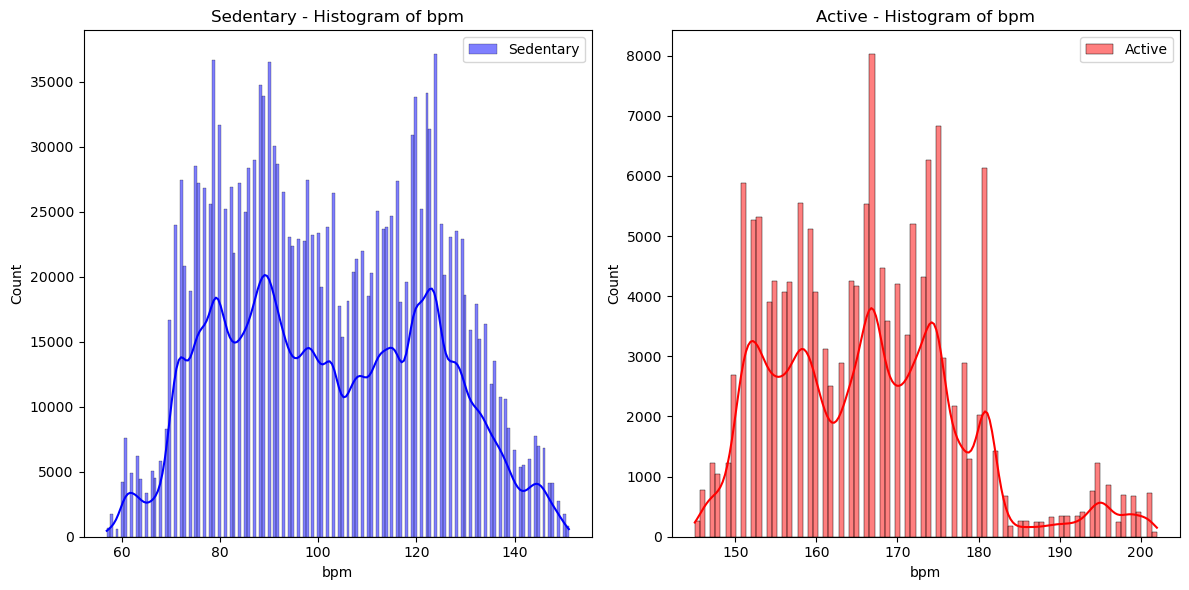

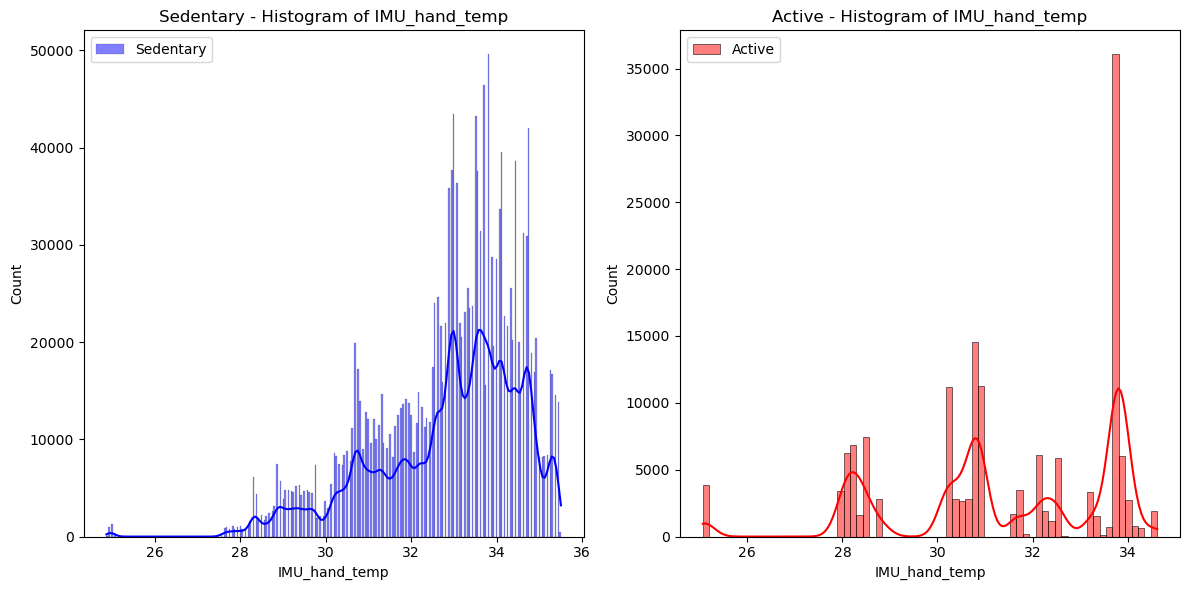

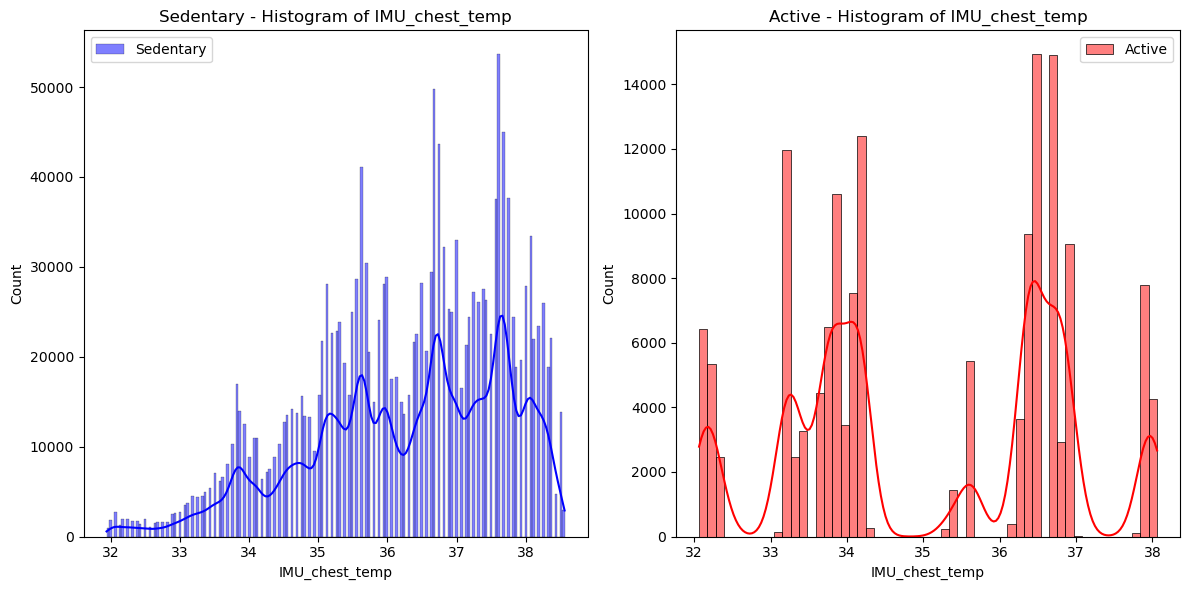

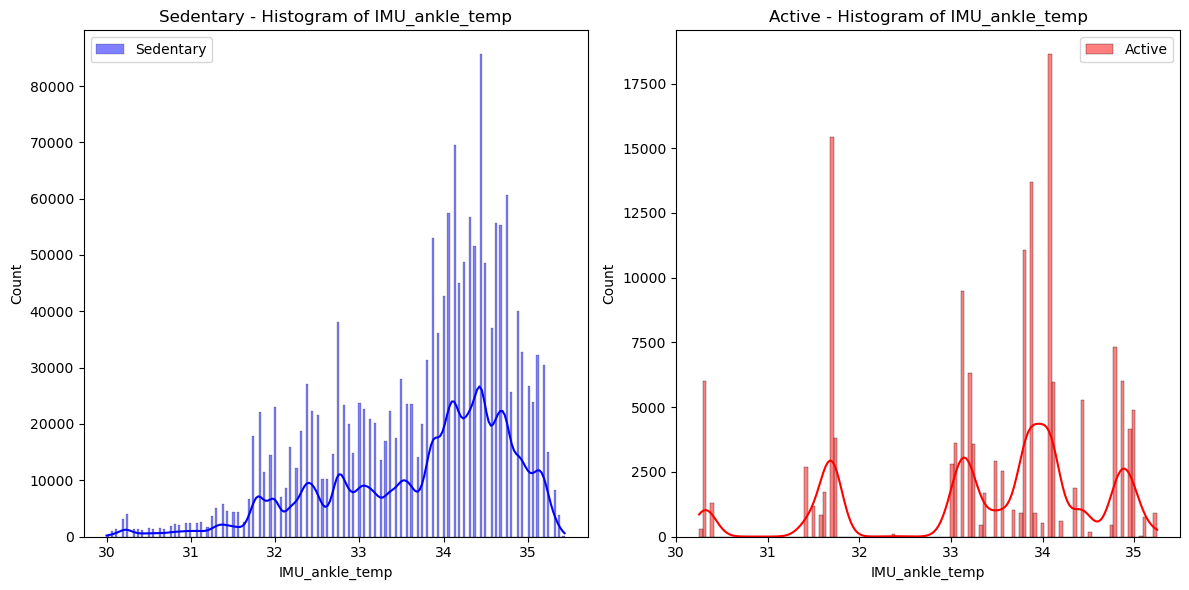

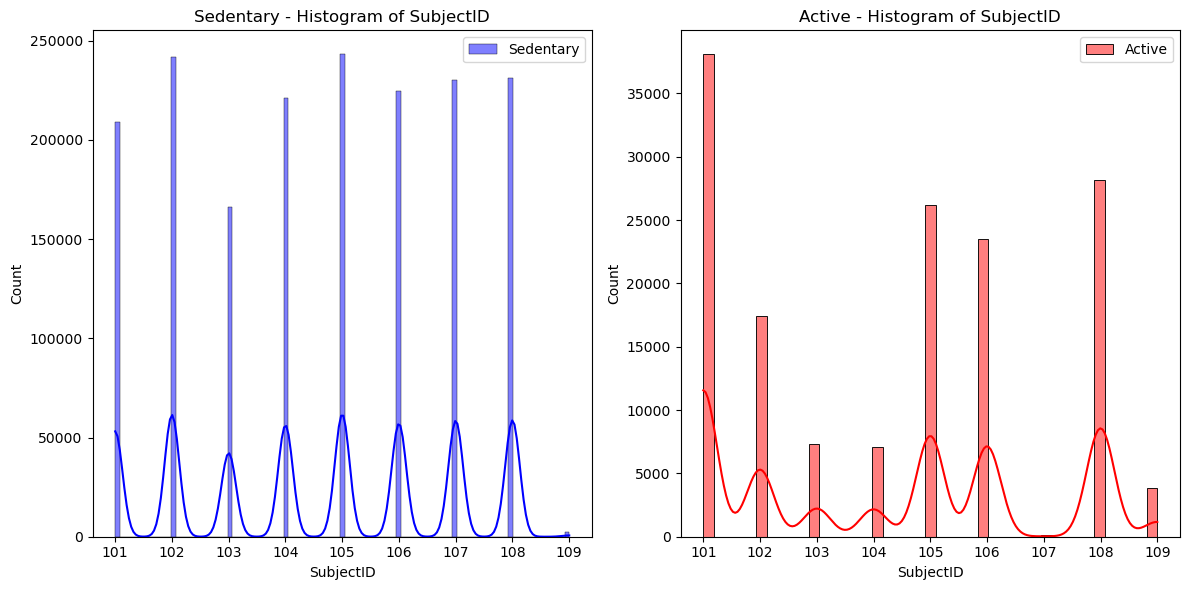

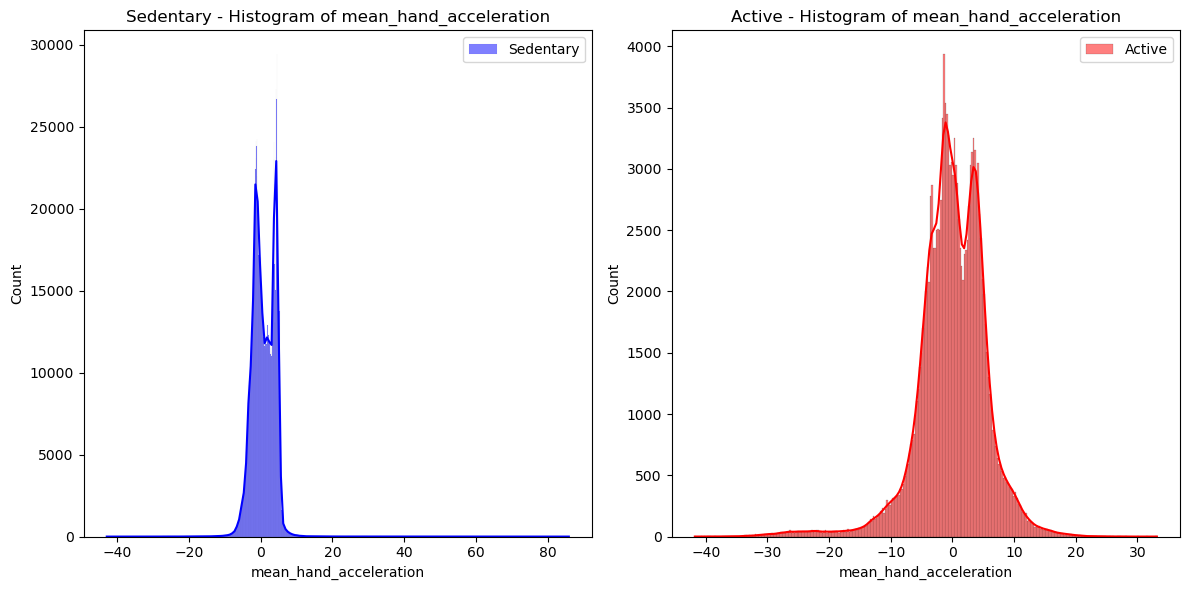

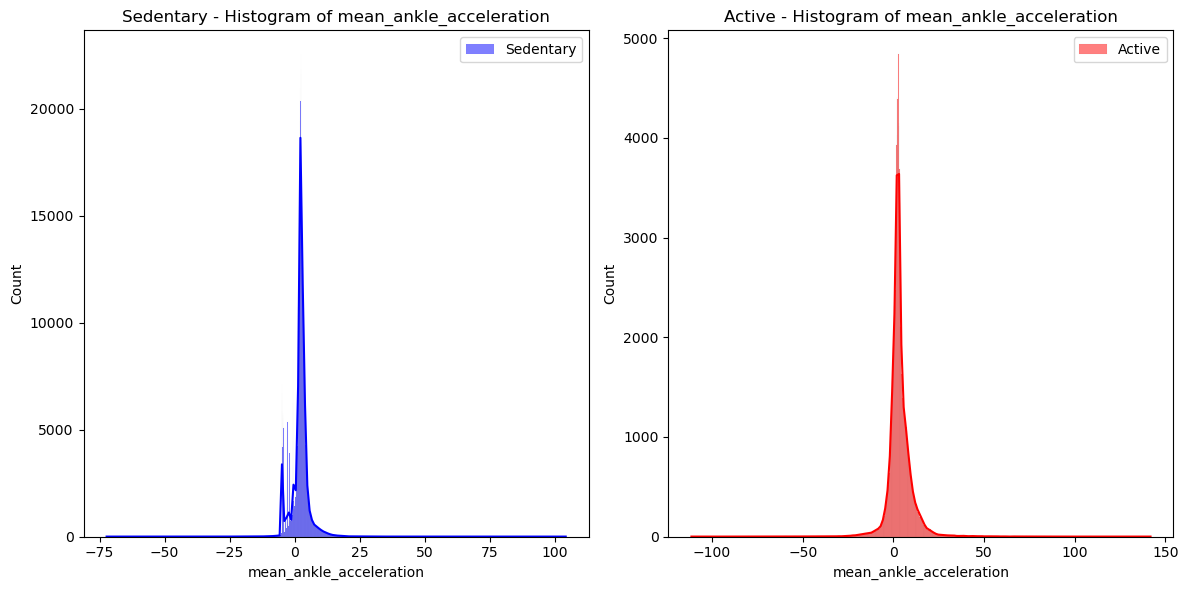

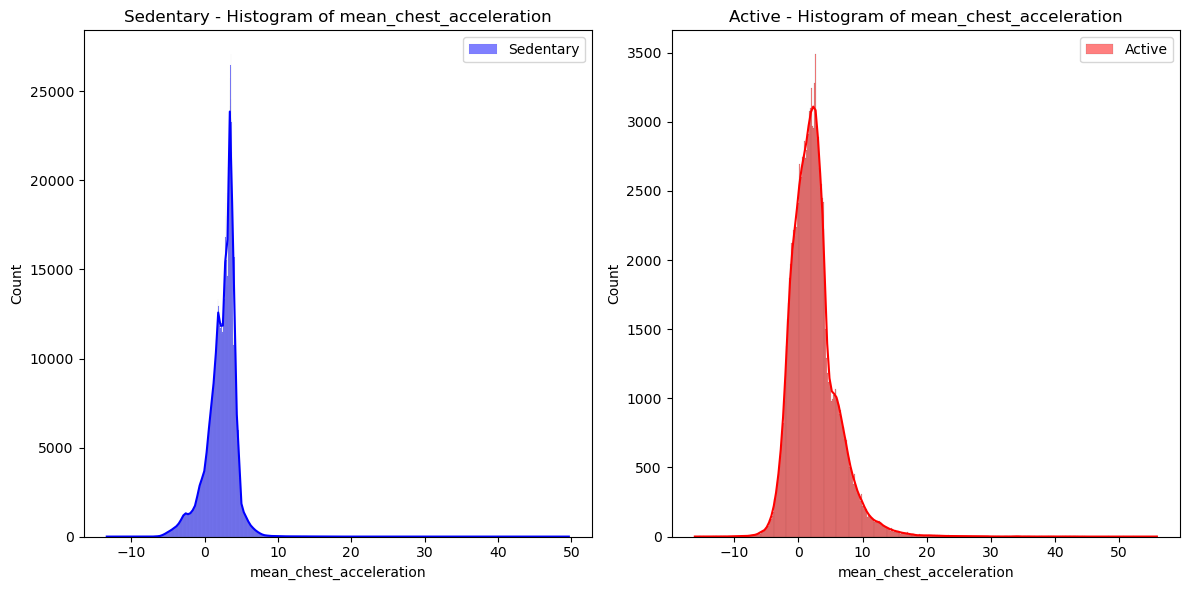

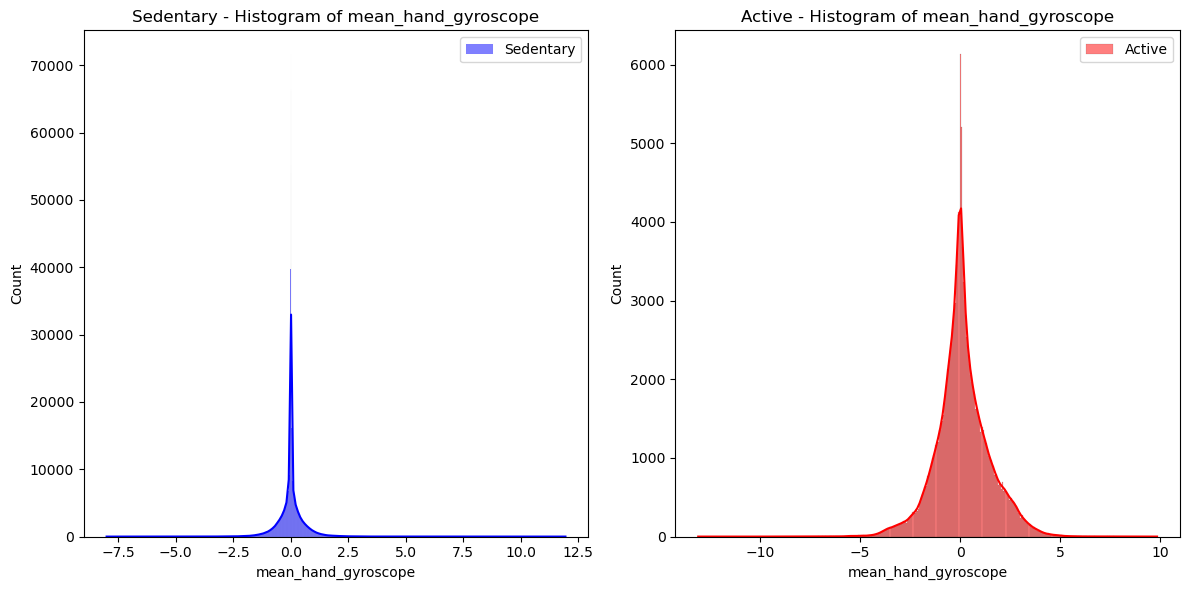

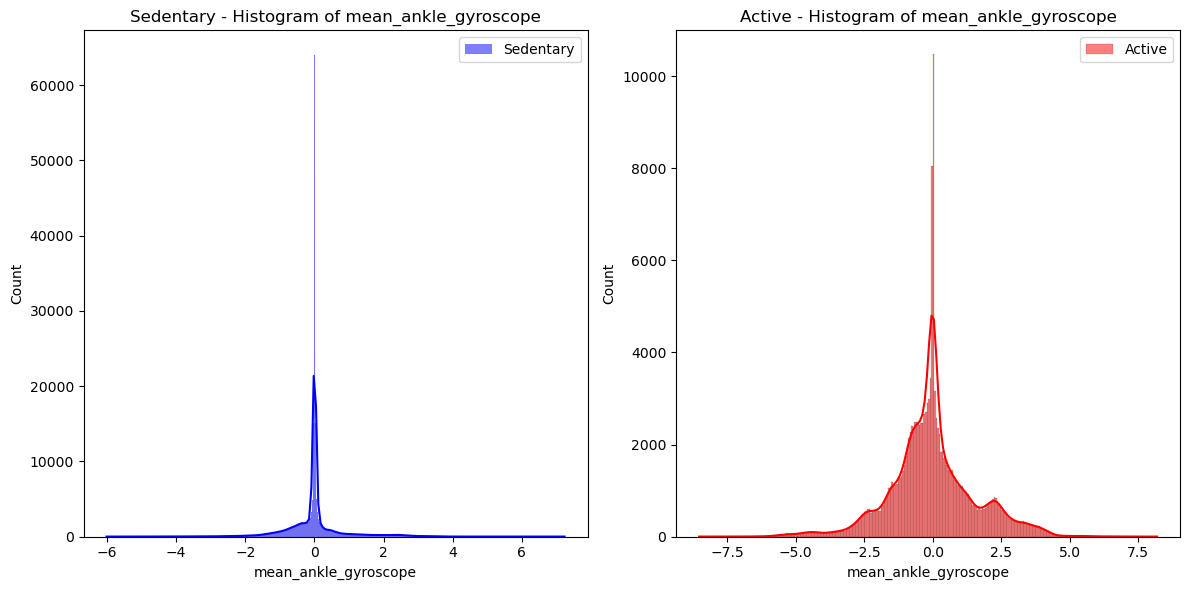

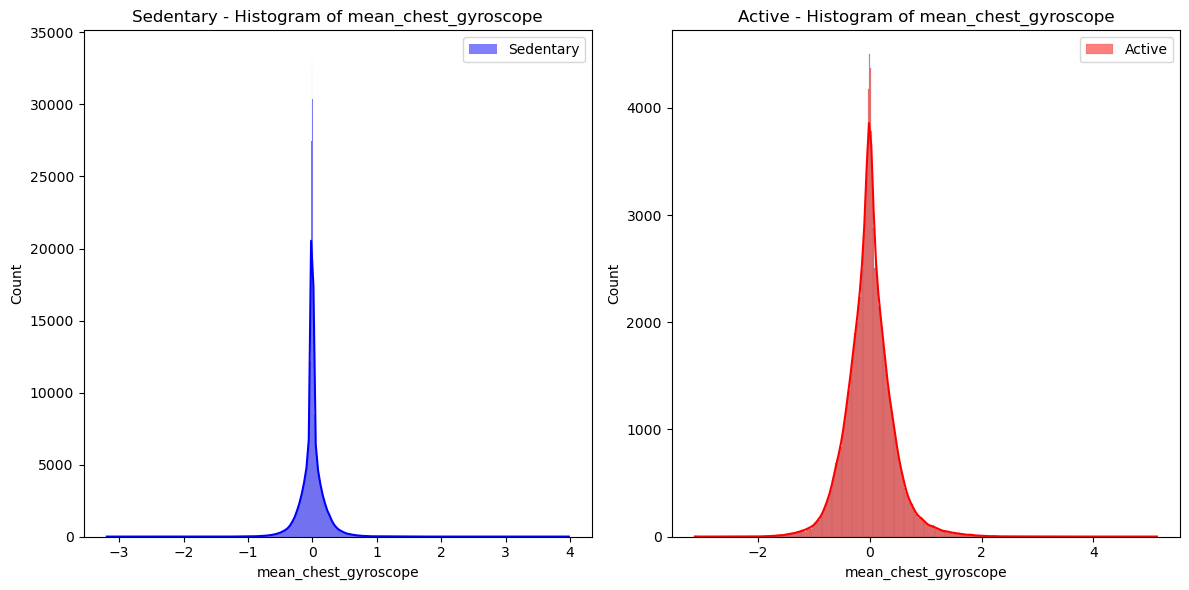

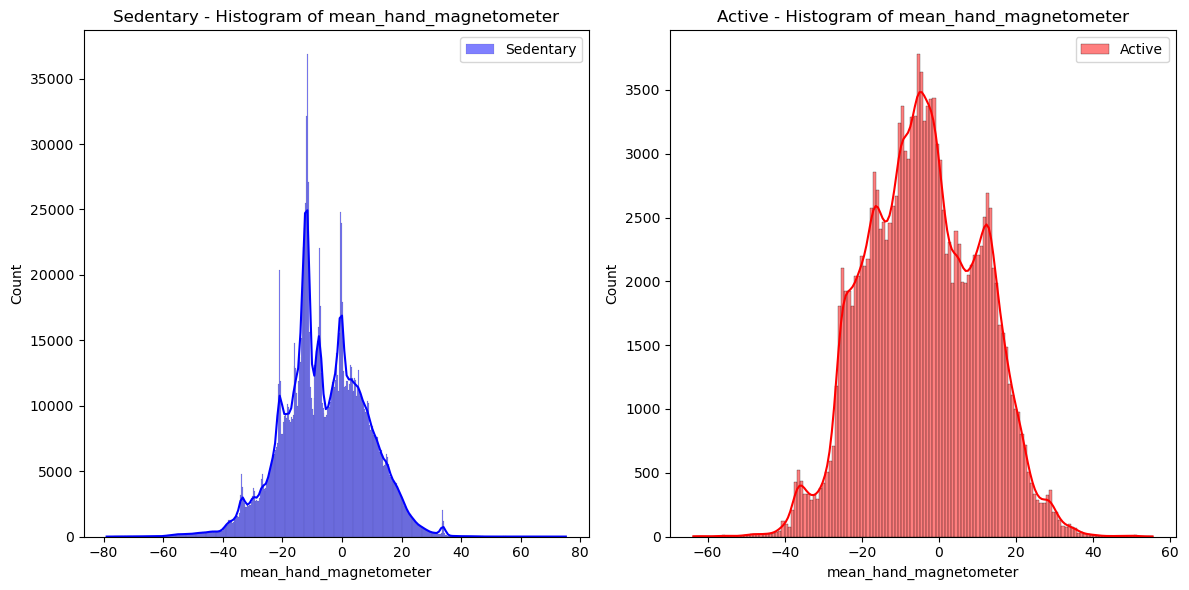

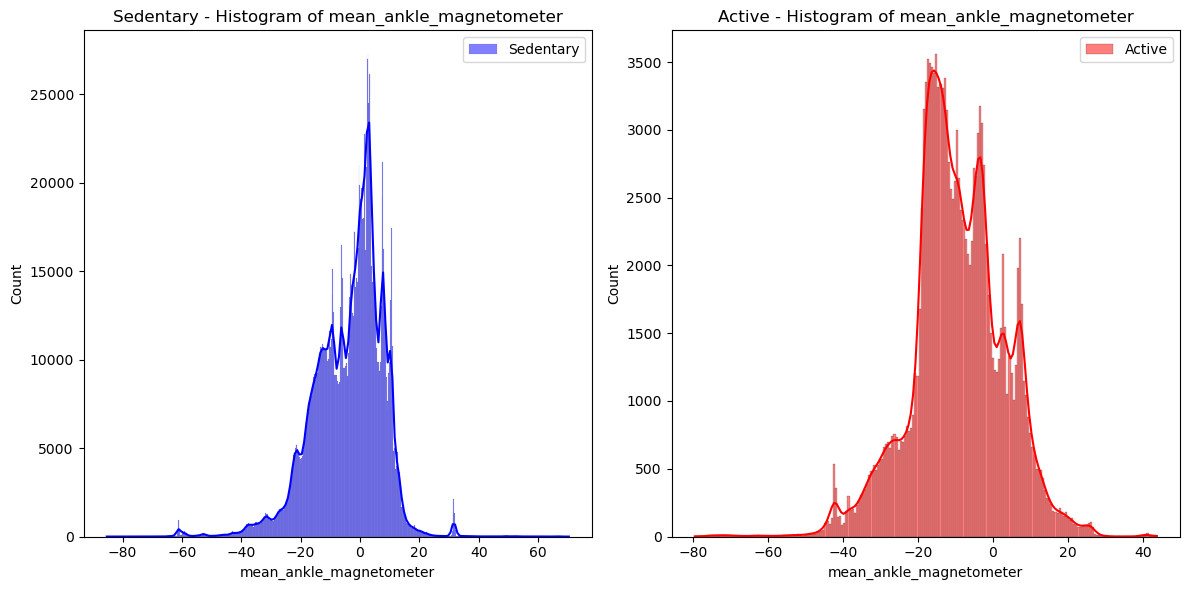

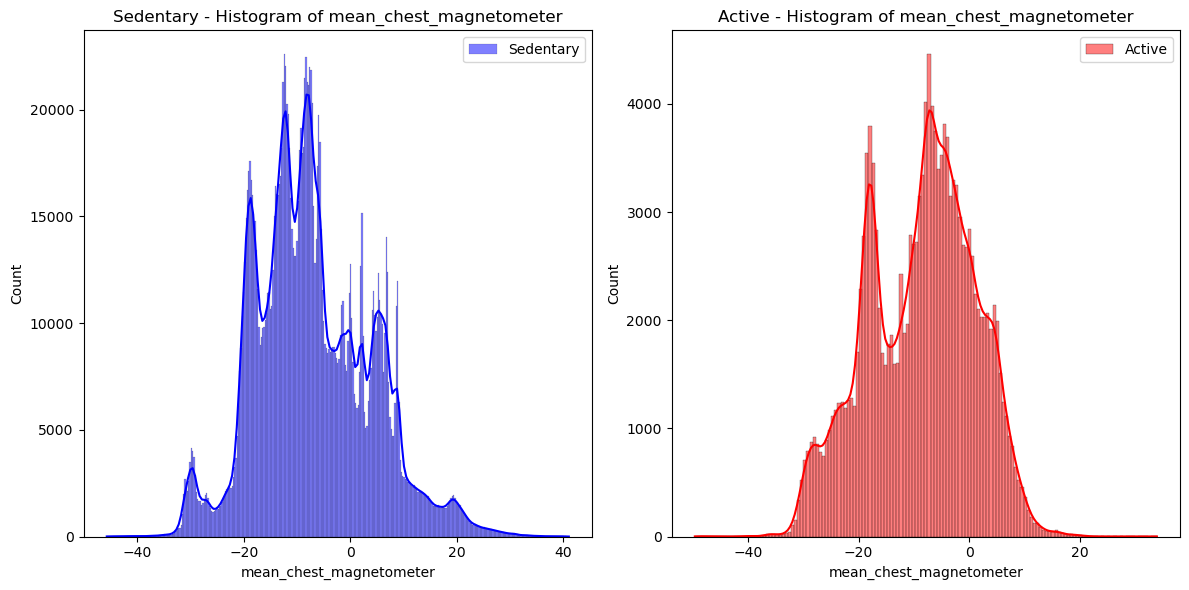

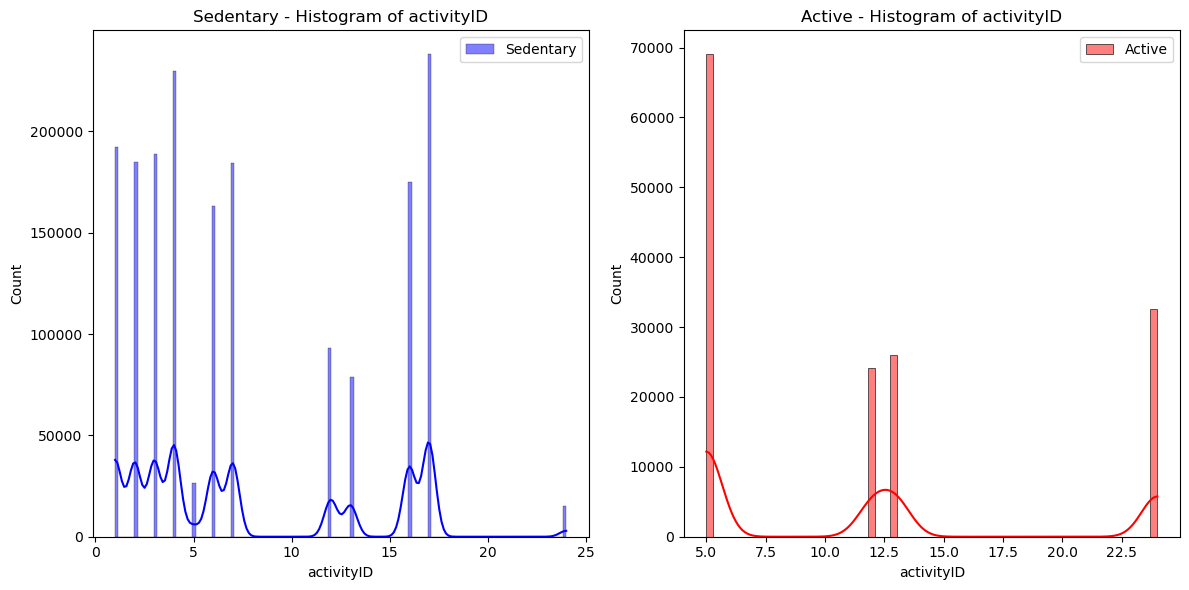

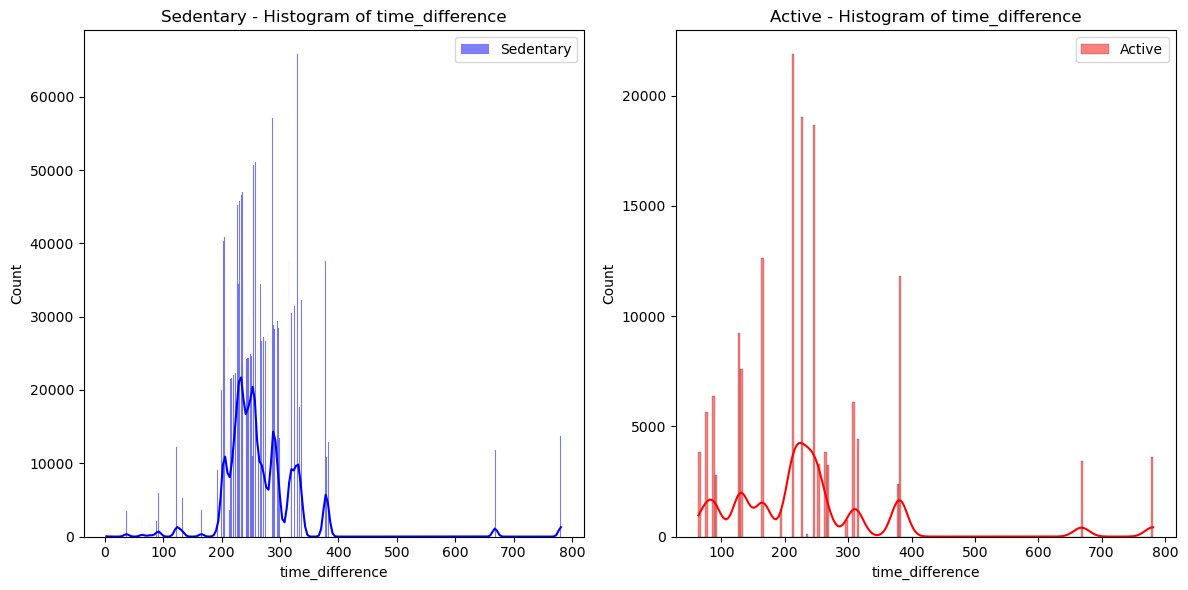

In [28]:
numeric_cols = sedentary_df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)  
    sns.histplot(sedentary_df[col], kde=True, color='blue', label='Sedentary')
    plt.title(f'Sedentary - Histogram of {col}')
    plt.legend()

    plt.subplot(1, 2, 2) 
    sns.histplot(active_df[col], kde=True,color='red',label='Active')
    plt.title(f'Active - Histogram of {col}')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [29]:
cols = df_medias.columns
hist_plots = ["bpm","time_difference"]
bar_plots = [c for c in cols if (c not in hist_plots)]    
    


As a following step, the code shows different ECDFs plots for the numerical features. These particular graphs are very good for interpreting differences in the behaviours of two sets of data. The further the two lines are apart from each other, the more significant the difference between the two groups is. The idea behind this analysis is that we will be able to focus our attention on specific features, according to how they behave in sedentary and active settings. 

In [30]:
#edited from Lab10 Solutions
from statsmodels.distributions.empirical_distribution import ECDF
 
numerical_cols = df_medias.select_dtypes(include=[np.number]).columns
bar_plots = [c for c in numerical_cols if c not in hist_plots]

def plot_ECDF(df_1, df_2, col, label_1, label_2, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1)
    
    values_1 = df_1[df_1[col].notna()][col].values
    values_2 = df_2[df_2[col].notna()][col].values

    if not values_1.size or not values_2.size:
        print(f"Skipping {col}: insufficient data")
        return
    
    if title is None:
        title = col
    
    ECDF_1 = ECDF(values_1)
    ECDF_2 = ECDF(values_2)
    xax = np.linspace(min(np.min(values_1),np.min(values_2)),max(np.max(values_1),np.max(values_2)),1001)
    ax.plot(xax,ECDF_1(xax),label=label_1)
    ax.plot(xax,ECDF_2(xax),label=label_2)
    ax.legend(loc="best")
    
    D = np.max(np.abs(ECDF_2(xax) - ECDF_1(xax)))
    ax.set_title(fr"{title}: $D$ = {D:.4f}")
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$\hat{F}_{X}(x)$")

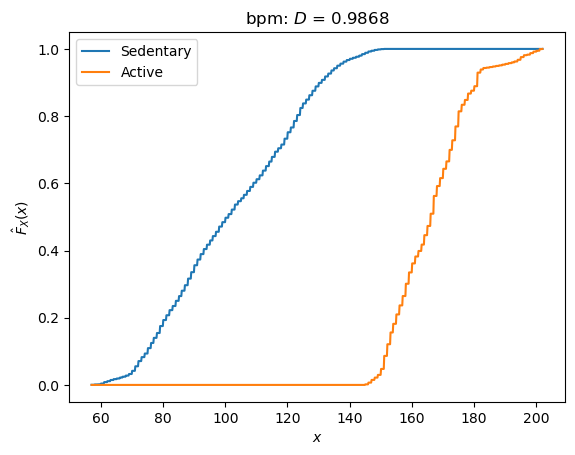

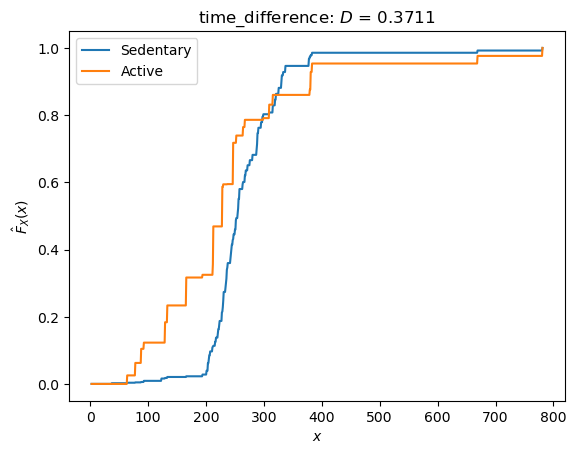

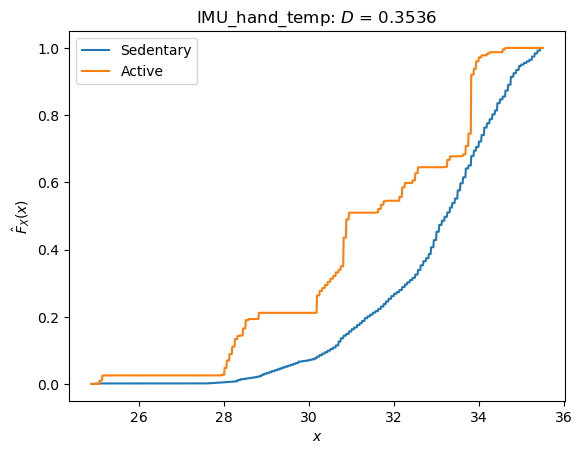

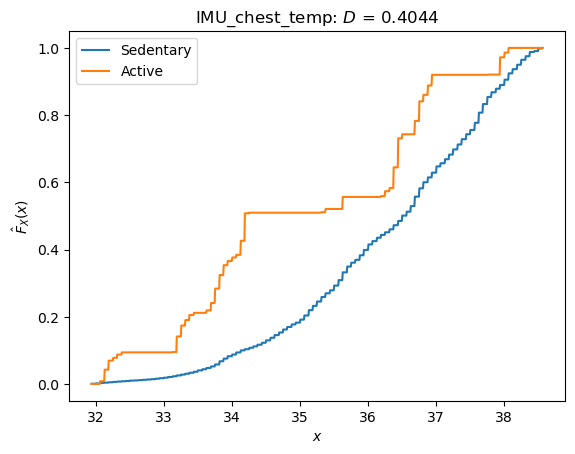

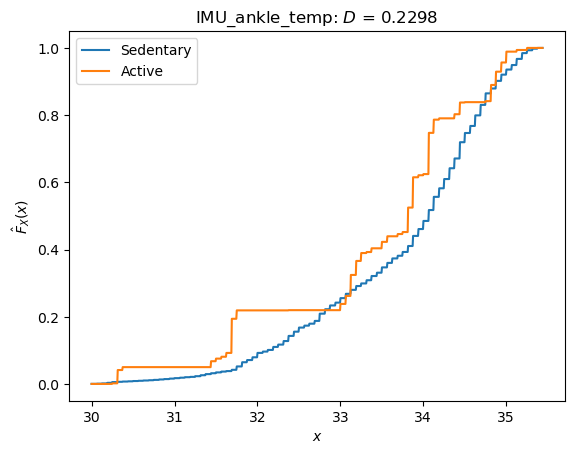

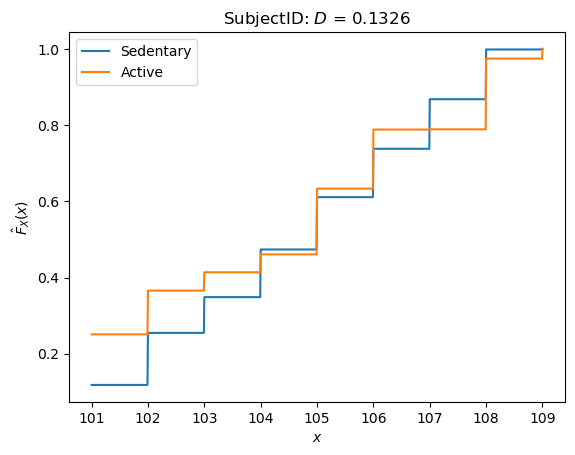

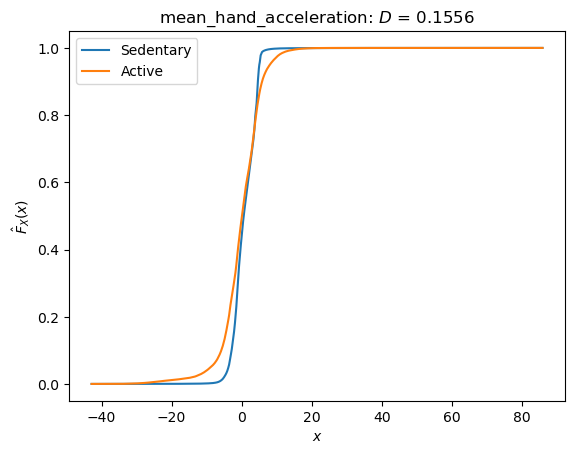

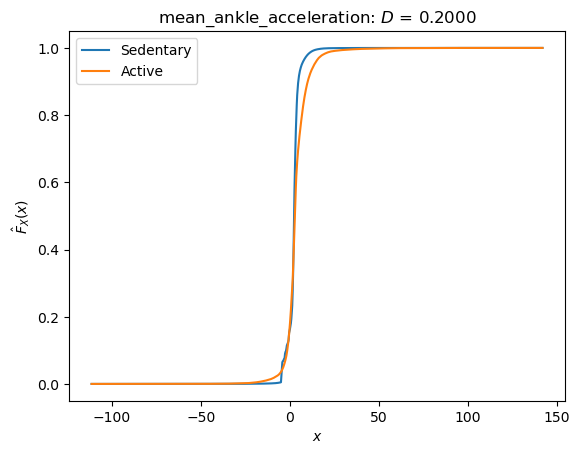

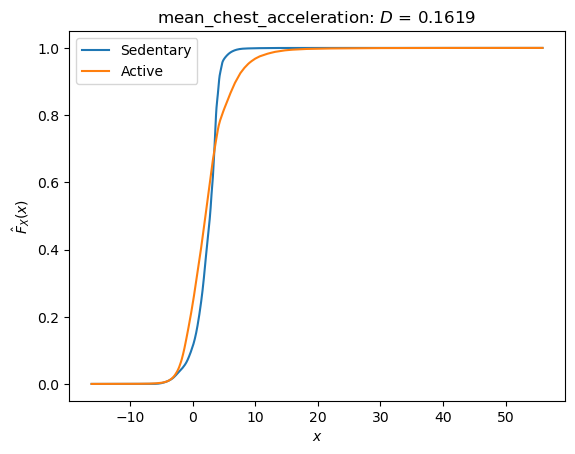

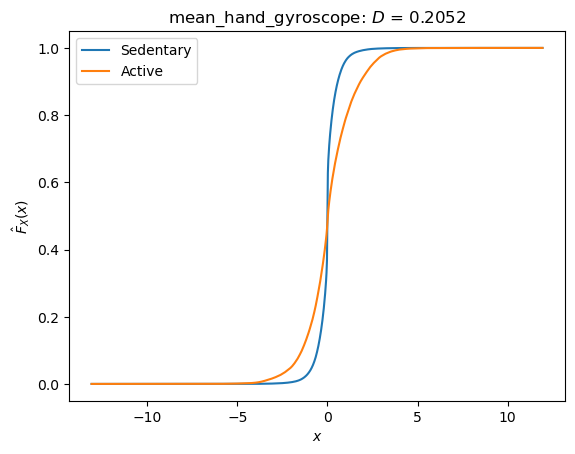

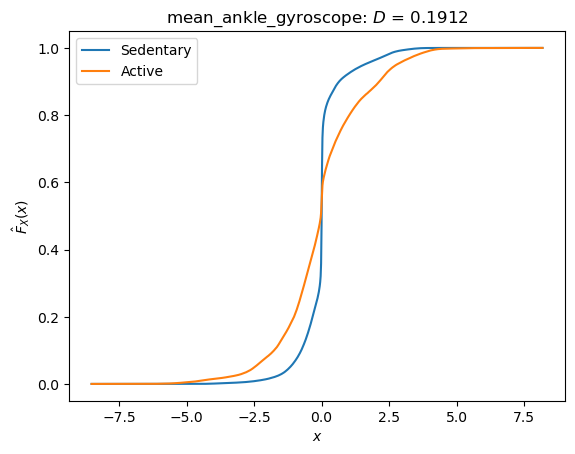

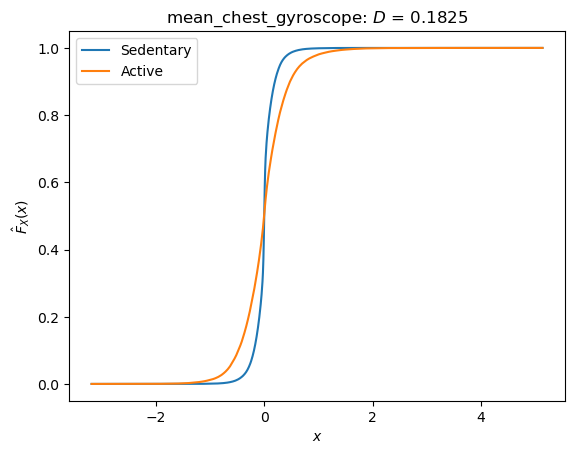

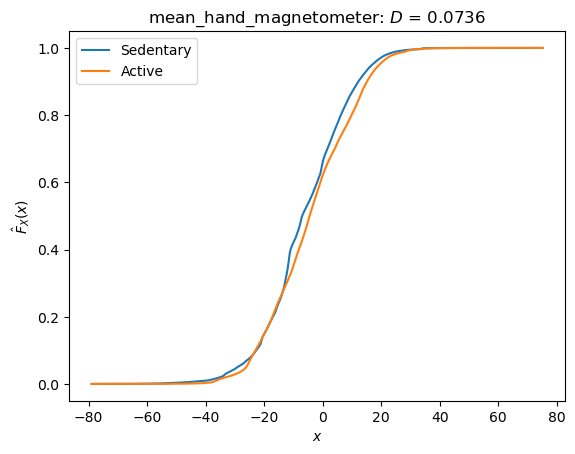

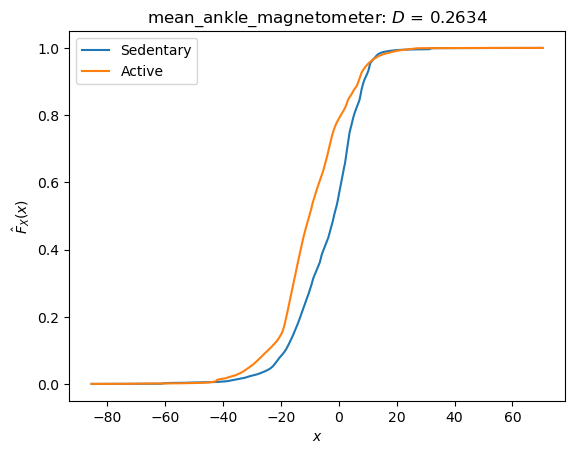

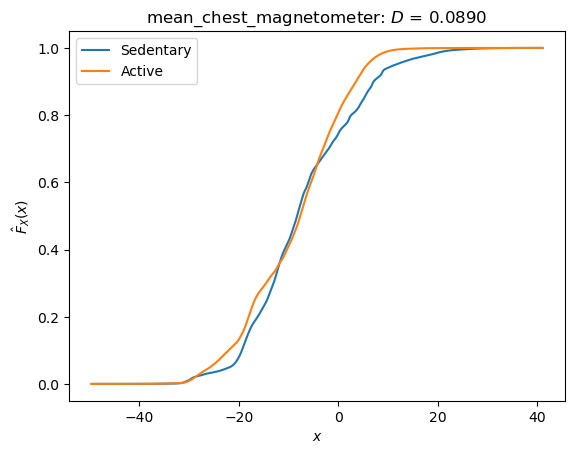

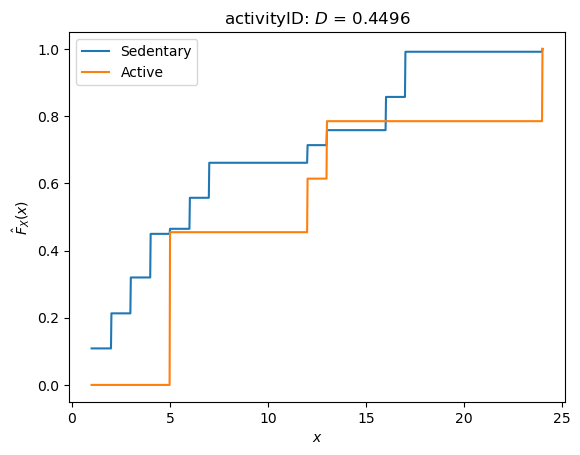

In [31]:
for col in hist_plots + bar_plots:
    plot_ECDF(sedentary_df, active_df, col, "Sedentary", "Active")
    

Following the values obtained in the ECDFs, we can see that **bpm** is the most significant feature that we need to focus on, because these readings for these two groups come from different distributions, indicating that active individuals have different heart rate characteristics compared to the sedentary individuals. Other features that have an interesting different behaviour are **time difference** and **chest temperature**, however, to continue this analysis I will be focusing only on heart rate and time difference. 

In [32]:
df_medias['activityID_legend'] = df_medias['activityID'].map(activity_dictonary)

Since we are now going to be focusing on **bpm** and **time difference**, we need to take a look at their boxplots, regarding the activities. The reason behind this is that the data collector requested that the models and the possible improvements that we advise should be linked to the activities.


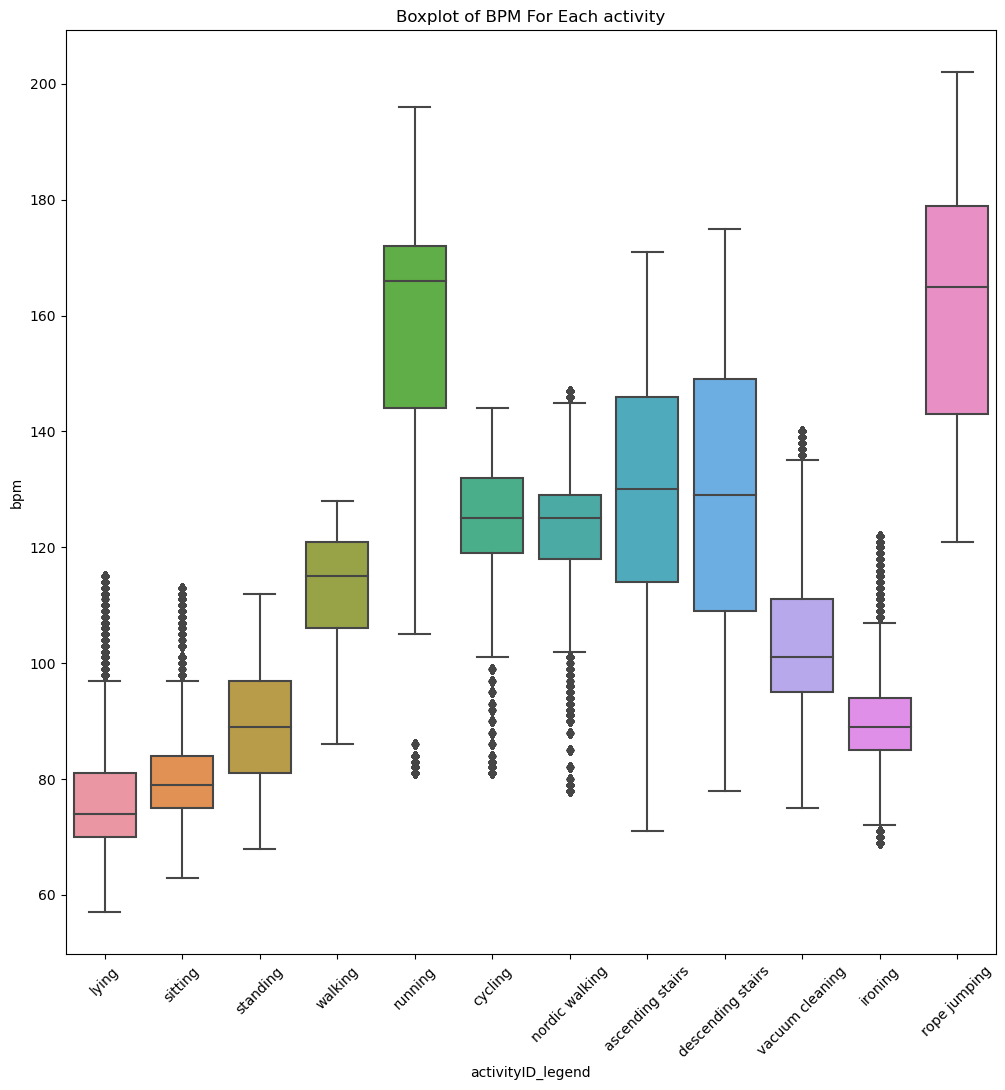

In [33]:
plt.figure(figsize=(12,12))
sns.boxplot(x='activityID_legend',y='bpm',data=df_medias).set_title("Boxplot of BPM For Each activity");
plt.xticks(rotation=45)
plt.show()

From the **bpm** boxplot, there are a few observations to be made. For instance, it is very clear to see that there are indicators that show that less vigorous activities carry lower heart rates. Another thing to point out is that there are some outliers, particularly in walking, standing and running. Outliers indicate that the data behaves differently in these points, meaning that some subjects have presented an abnormal value, in comparison to the rest, for these activities. Finally, the activities show different levels of variability, rope jumping and running have a wide IQR, suggesting a high variability among participants during these activities. Conversely, activities like lying and sitting have a much narrower IQR, suggesting less variability.

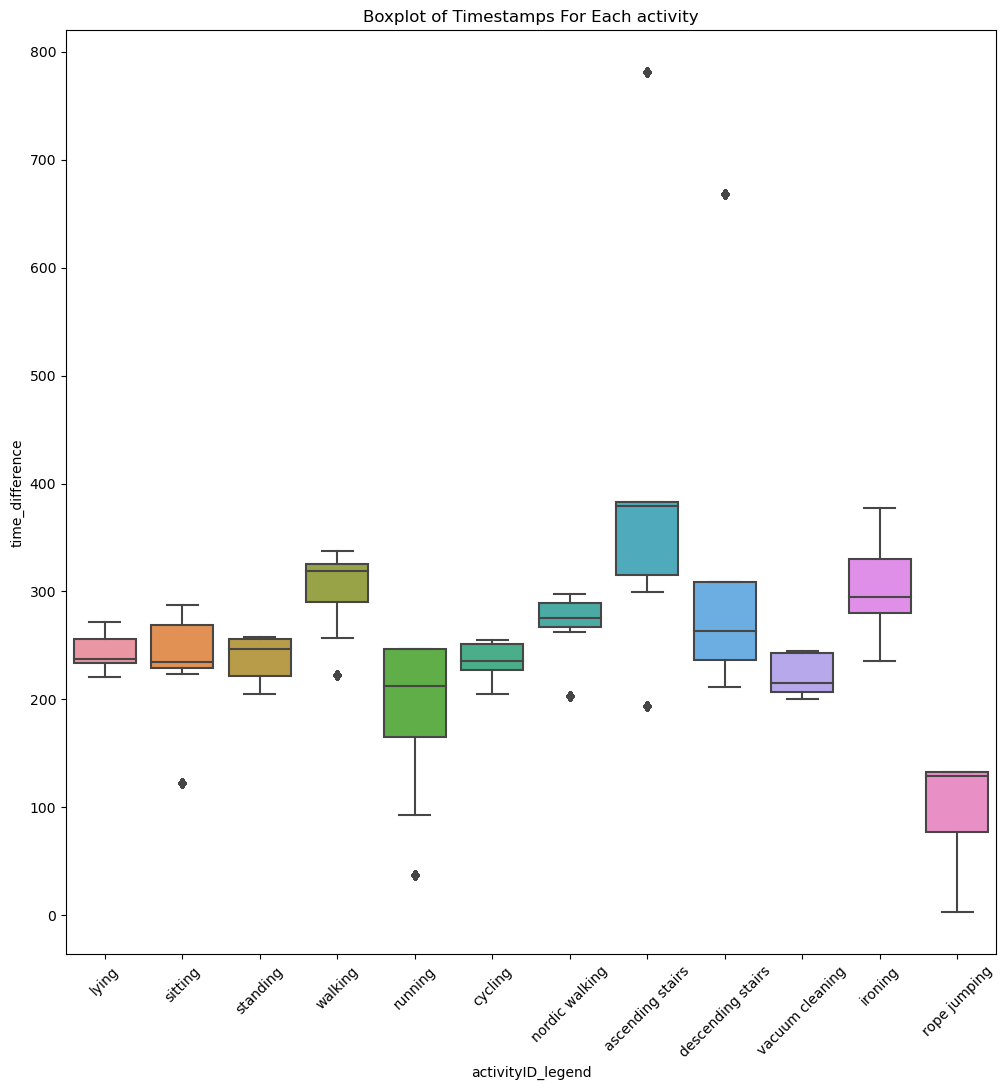

In [34]:
plt.figure(figsize=(12,12))
sns.boxplot(x='activityID_legend',y='time_difference',data=df_medias).set_title("Boxplot of Timestamps For Each activity");
plt.xticks(rotation=45)
plt.show()

From the **time difference** boxplot, there are a few observations to be made. Firstly, in activities like lying, sitting, and rope jumping, there are outliers that indicate anomalies in the data. Secondly, rope jumping has a smaller box and lower median, which indicates that subjects spent less time during this activity. On the other hand, activities like vacuuming and cycling took longer, which can be attributed to the activity itself, but also can be related to the toll each activity takes on the body. This last observation is a very interesting point to consider for this report, taking into account that we are looking at an IMU. 

Continuing with the exploratory data analysis, the next step I decided to take is Principal Component Analysis. PCA is a statistical procedure that can reveal the structure of the data, to understand the relationship among variables. As its name mentions, the principal component is selected, reflecting the data’s variance.

Text(0.5, 1.0, 'Explained Variance for the Dataset')

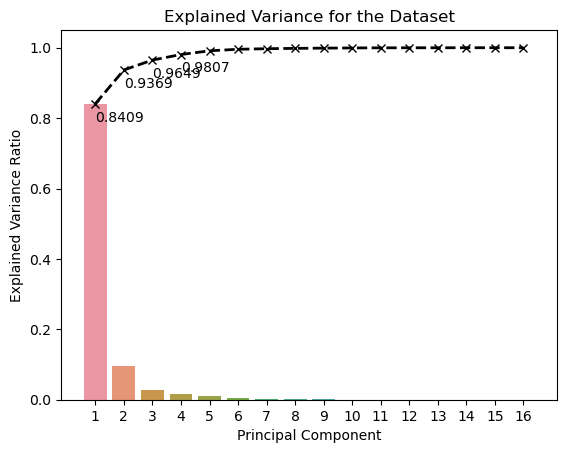

In [35]:
#edited from Lab10 Solutions
from sklearn.decomposition import PCA
df_numeros = df_medias.select_dtypes(include=[np.number])
pca = PCA().fit(df_numeros)
comps = pca.components_
ev_ratio = pca.explained_variance_ratio_ 
cumul_ev_ratio = np.cumsum(ev_ratio)
pcs = np.arange(1,len(df_numeros.columns)+1)
loadings = pd.DataFrame(data=comps,columns=[f"PC{pc}" for pc in pcs],index=df_numeros.columns)

fig,ax = plt.subplots(nrows=1,ncols=1)
sns.barplot(x=pcs,y=ev_ratio)
ax.plot(pcs-1,cumul_ev_ratio,ls="--",marker="x",lw=2,c="k")
for pc,cer in zip(pcs,cumul_ev_ratio):
    ax.annotate(f"{cer:.4f}",xy=(pc-1,cer-0.05))
    if cer > 0.98:
        break
ax.set_xlabel("Principal Component")
ax.set_ylabel("Explained Variance Ratio")
ax.set_title("Explained Variance for the Dataset")

In [36]:
#Used ChatGPT. Prompted: having a PCA plot, how do I know which one is the principal component
from sklearn.decomposition import PCA

pca = PCA().fit(df_numeros)
ev_ratio = pca.explained_variance_ratio_
first_component = pca.components_[0]
loadings_df = pd.DataFrame(pca.components_, columns=df_numeros.columns)
first_component_loadings = loadings_df.iloc[0]

significant_features = first_component_loadings.abs().sort_values(ascending=False)
print("Most significant features for the First Principal Component:")
print(significant_features.head())

Most significant features for the First Principal Component:
time_difference            0.999860
mean_chest_magnetometer    0.008692
mean_hand_magnetometer     0.007868
bpm                        0.005917
IMU_chest_temp             0.005485
Name: 0, dtype: float64


From the PCA plot, and the written explanation, it is clear that the feature **time_difference** explains a large part of the variation of the dataset. Something that is congruent with the previous analysis done with ECDFs. 

A final thing to point out is that the following features that explain variation in the dataset are **mean_chest_magnetometer**, **mean_hand_magnetometer** and **bpm**. These last three correspond to a significantly smaller portion of the variation, but the presence of heart rate as one of the principal features helps us move along with this analysis. 


Having identified the principal component of the dataset, it’s time to add some more information provided by the data collector, that is not entirely included in the original dataset but that will give valuable insights into possible improvements of the product. 

Amongst the information provided to me, there was a detailed chart about the subjects and there was also a chart that mentioned METs and their relationship to each activity.  METs stands for **Metabolic Equivalent of Task**, it’s a measurement that is based on the amount of energy that is used, based on the notion that only 1 MET is used when a person is sitting calmly. This scale is used to measure the intensity of different exercises, giving a clear view of how active a person is. Additionally, there is a scientific consensus on how many METs an adult human should be utilizing per week. It is recommended that a healthy adult expends between 450 and 750 METs per week.

The following code generates a **df_subjects** with the information that we have of the subjects, and then goes into creating a **df_calculos** that takes this information, activity, bpm, exercise intensity and time difference, and calculates the corresponding METs expended by each subject in each activity.


In [37]:
data = {
    "SubjectID": [101, 102, 103, 104, 105, 106, 107, 108, 109],
    "Sex": ["Male", "Female", "Male", "Male", "Male", "Male", "Male", "Male", "Male"],
    "Age": [27, 25, 31, 24, 26, 26, 23, 32, 31],
    "Height": [182, 169, 187, 194, 180, 183, 173, 179, 168],
    "Weight": [83, 78, 92, 95, 73, 69, 86, 87, 65],
    "bpm": [75, 74, 68, 58, 70, 60, 60, 66, 54],
    "Maxbpm": [193, 195, 189, 196, 194, 194, 197, 188, 189],
    "Dominant hand": ["right", "right", "right", "right", "right", "right", "right", "left", "right"]
}

df_subjects = pd.DataFrame(data)
df_subjects

,SubjectID,Sex,Age,Height,Weight,bpm,Maxbpm,Dominant hand
0,101,Male,27,182,83,75,193,right
1,102,Female,25,169,78,74,195,right
2,103,Male,31,187,92,68,189,right
3,104,Male,24,194,95,58,196,right
4,105,Male,26,180,73,70,194,right
5,106,Male,26,183,69,60,194,right
6,107,Male,23,173,86,60,197,right
7,108,Male,32,179,87,66,188,left
8,109,Male,31,168,65,54,189,right


In [38]:
df_medias

,bpm,IMU_hand_temp,IMU_chest_temp,IMU_ankle_temp,SubjectID,mean_hand_acceleration,mean_ankle_acceleration,mean_chest_acceleration,mean_hand_gyroscope,mean_ankle_gyroscope,mean_chest_gyroscope,mean_hand_magnetometer,mean_ankle_magnetometer,mean_chest_magnetometer,activityID,exercise_intensity,time_difference,activityID_legend
0,100.0,30.375,32.1875,30.75,101.0,5.360660,2.662032,2.707567,0.007228,-0.007684,0.000145,-26.325367,-52.113767,-1.962178,1.0,Resting,271.86,lying
1,100.0,30.375,32.1875,30.75,101.0,5.236503,2.597479,2.733360,-0.051923,0.009278,-0.021601,-26.428167,-51.858967,-2.020103,1.0,Resting,271.86,lying
2,100.0,30.375,32.1875,30.75,101.0,5.085573,2.571709,2.703949,-0.075399,-0.030899,-0.003142,-25.951613,-51.578933,-2.079840,1.0,Resting,271.86,lying
3,100.0,30.375,32.1875,30.75,101.0,5.086983,2.636982,2.744582,-0.053495,-0.008136,-0.035405,-26.023973,-51.915767,-2.057705,1.0,Resting,271.86,lying
4,100.0,30.375,32.1875,30.75,101.0,5.217407,2.661912,2.796648,-0.027902,-0.017951,-0.017464,-26.037313,-51.737067,-2.441961,1.0,Resting,271.86,lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921425,162.0,25.125,32.3750,31.50,109.0,5.537257,1.634507,2.304086,-0.053589,0.004761,-0.072864,-23.730043,-15.595791,3.486200,24.0,Vigorous,63.90,rope jumping
1921426,162.0,25.125,32.3750,31.50,109.0,5.471683,1.583083,2.253289,-0.045453,0.003369,-0.061935,-23.828237,-15.437418,3.469400,24.0,Vigorous,63.90,rope jumping
1921427,162.0,25.125,32.3750,31.50,109.0,5.420900,1.595727,2.316360,-0.044983,-0.018141,-0.017922,-23.496437,-15.400991,3.687233,24.0,Vigorous,63.90,rope jumping
1921428,162.0,25.125,32.3750,31.50,109.0,5.420890,1.647030,2.314066,-0.020135,-0.023868,-0.011660,-23.992003,-15.264915,3.214000,24.0,Vigorous,63.90,rope jumping


In [39]:
grouped_medias = df_medias.groupby(['SubjectID', 'activityID']).agg({
    'bpm': 'mean',  
    'time_difference': 'first',  
    'exercise_intensity': 'first' 
}).reset_index()


df_calculos = grouped_medias.merge(
    df_subjects[['SubjectID', 'Sex', 'Age', 'Weight']],
    on='SubjectID',
    how='left'
)

df_calculos['time_difference'] = df_calculos['time_difference'] / 60


activity_details = {
    1: (1.0, 3),
    2: (1.8, 3),
    3: (1.8, 3),
    4: (3.3, 3),
    5: (7.0, 3),
    6: (4.0, 3),
    7: (5.0, 3),
    9: (1.0, 3),
    10: (1.8, 3),
    11: (1.8, 3),
    12: (8.0, 1),
    13: (3.0, 1),
    16: (3.5, 3),
    17: (2.3, 3),
    18: (1.8, 3),
    19: (3.8, 3),
    20: (8.0,3),
    24: (10.0,2)
    
}

def calculo_METs(row):
    activity_id = row['activityID']
    if activity_id in activity_details:
        valor_met, duracion_estandar = activity_details[activity_id]
        duracion_real = row['time_difference']
        return (duracion_real / duracion_estandar) * valor_met
    return 0



df_calculos['METs'] = df_calculos.apply(calculo_METs, axis=1)
df_calculos = df_calculos[['SubjectID', 'activityID', 'bpm', 'exercise_intensity', 'time_difference', 'METs']]

df_calculos.head()

,SubjectID,activityID,bpm,exercise_intensity,time_difference,METs
0,101.0,1.0,87.530925,Resting,4.531000,1.510333
1,101.0,2.0,91.180737,Resting,3.913167,2.347900
2,101.0,3.0,103.411105,Resting,3.619333,2.171600
3,101.0,4.0,120.484216,Resting,3.708667,4.079533
4,101.0,5.0,161.355976,Resting,3.544000,8.269333


In [40]:
df_calculos['bpm'] = df_calculos['bpm'].round(2)
df_calculos['METs'] = df_calculos['METs'].round(2)
df_calculos['time_difference'] = df_calculos['time_difference'].round(2)

The new data frame grouped information that was repetitive in the previous data frame, such as time difference, activity, and exercise intensity; however, it was necessary to calculate the average heart rate per person per activity to properly calculate the METs column. This reduction may seem drastic, but it’s still preserving the original information provided to us, and I decided that the calculation of the METs used per activity should be the main focus at this point.

In [41]:
df_calculos

,SubjectID,activityID,bpm,exercise_intensity,time_difference,METs
0,101.0,1.0,87.53,Resting,4.53,1.51
1,101.0,2.0,91.18,Resting,3.91,2.35
2,101.0,3.0,103.41,Resting,3.62,2.17
3,101.0,4.0,120.48,Resting,3.71,4.08
4,101.0,5.0,161.36,Resting,3.54,8.27
...,...,...,...,...,...,...
85,108.0,13.0,143.31,Resting,3.52,10.56
86,108.0,16.0,106.68,Resting,4.05,4.72
87,108.0,17.0,89.04,Resting,5.50,4.22
88,108.0,24.0,174.31,Moderate,1.47,7.34


Presently, it’s time to perform a K-Means clustering model. Following the same path that we have through this report, the purpose is to see how much the principal components that we detected, time difference and bpm, plus the component that was requested of us by the data collector, acitivityID, are related to METs value.  

K-Means clustering is an unsupervised mathematical model that assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid is minimized. The main purpose of this technique is to group similar data points and discover patterns that show similarity. Finding patterns amongst the data gives us insight into its behaviour and helps us predict how it will continue to behave. 


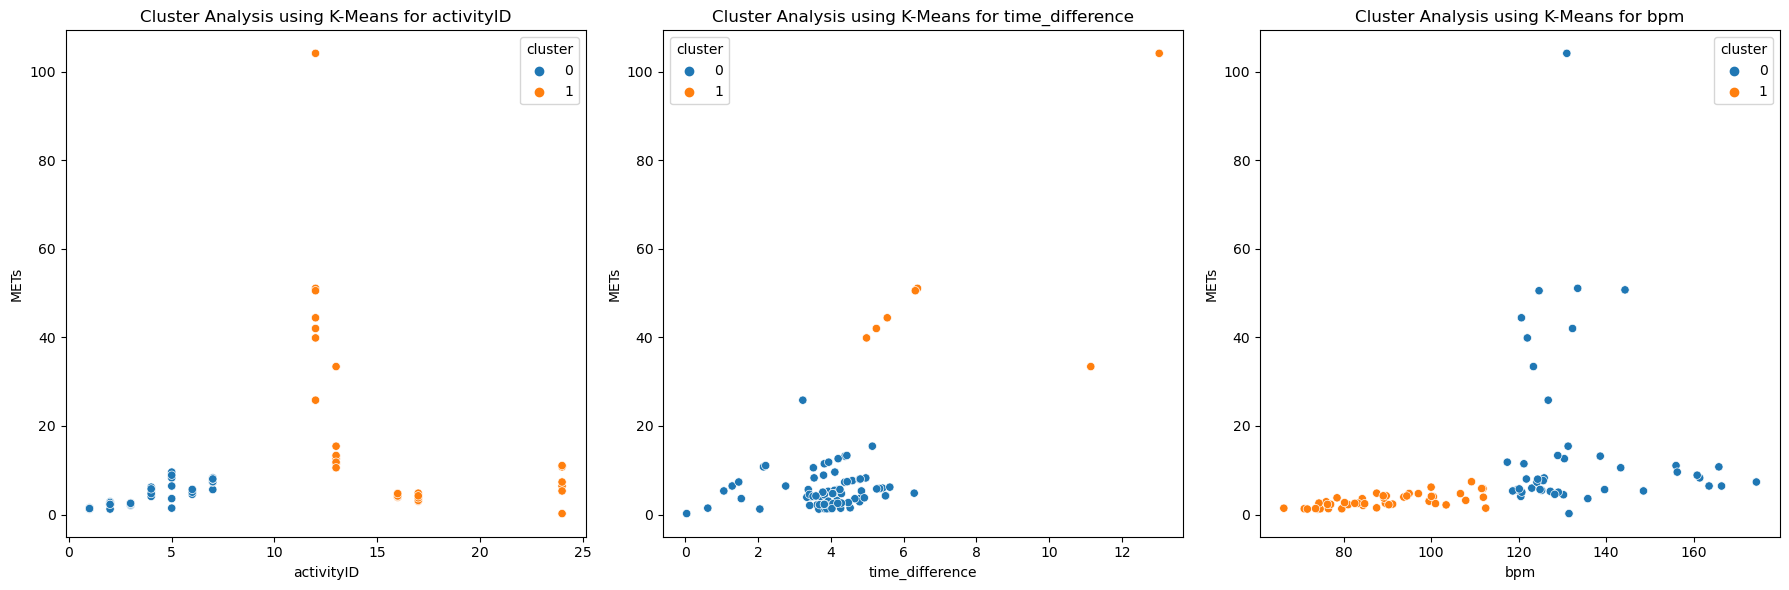

In [42]:
#edited from Lab10 Solutions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

n_clusters = 2
features = ['activityID', 'time_difference', 'bpm']

for i, feature in enumerate(features):
    df_numeros = df_calculos[[feature, 'METs']].copy()
    scaler = StandardScaler()
    df_numeros_scaled = scaler.fit_transform(df_numeros)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df_numeros_scaled)
    df_numeros['cluster'] = kmeans.labels_

    sns.scatterplot(data=df_numeros, x=feature, y="METs", hue='cluster', ax=axes[i])
    axes[i].set_title(f"Cluster Analysis using K-Means for {feature}")

plt.tight_layout()
plt.show()

**Activity ID**: this graphic shows that the model was able to identify two clusters and it shows that the data was divided by the scale of the activity. The vertical lines in this cluster model reflect the nature of this column, which is not a continuous value. This point will need to be studied further. 

**Time Difference**: this graph shows that shorter activities are grouped together, leaving the longer activities in a different cluster. This is congruent with the idea that the longer someone exercises, the more energy they will spend. 

**BPM**: this graph shows that lower bpm values are clustered together while higher ones are grouped in a different cluster. This suggests a correlation between the heart rate and the value of METS.  

The separation of the clusters for all features highly suggests a correlation between these three columns and METs, although, it is important to point out that the activityID needs to be revisited since the vertical lines indicate a categorical feature. 


In [43]:
df_calculos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           90 non-null     float64
 1   activityID          90 non-null     float64
 2   bpm                 90 non-null     float64
 3   exercise_intensity  90 non-null     object 
 4   time_difference     90 non-null     float64
 5   METs                90 non-null     float64
dtypes: float64(5), object(1)
memory usage: 4.3+ KB


Continuing with the model creation, I wanted to test if one of the features would be better to create a model that could predict the behavior of METs. That’s why the next code shows an **AIC feature selection**, with a linear regression model. 

AIC is a measurement used in model selection to quantify the quality of fit of a model, given the model a score. Through this process, the best feature, or features, to predict METs is chosen. The **Linear Regression** model uses all the features selected and tries to predict the values of METs, generating an **R-squared** value that gives the model a score. 


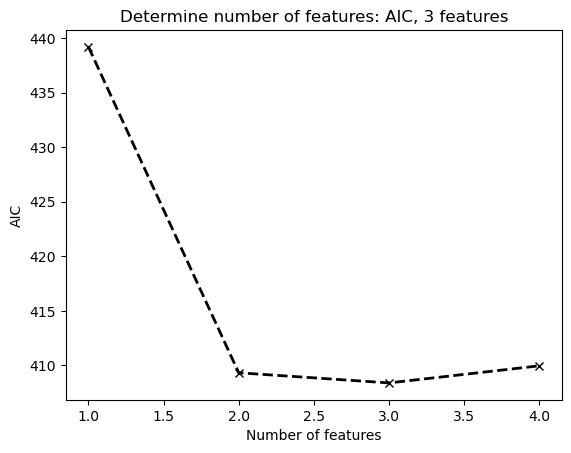

Best number of features: 3
Best features: ['activityID' 'bpm' 'time_difference']
Best model score: 0.6171299201242995


In [44]:
#edited from Lab10 solutions

df_calculos = df_calculos.select_dtypes(include=[np.number])
y = df_calculos['METs']
X = df_calculos.drop(columns=['METs'])


AIC = np.zeros(len(X.columns))
lm = LinearRegression()
num_features = np.arange(1, len(X.columns) + 1)  
sfs_features = {nf: {} for nf in num_features[:-1]}  


for idx, nf in enumerate(num_features[:-1]):
    sfs = SequentialFeatureSelector(lm, n_features_to_select=nf, direction='forward').fit(X, y)
    features = sfs.get_feature_names_out()
    new_X = X[list(features)]
    nf_lm = lm.fit(new_X, y)
    score = nf_lm.score(new_X, y)
    y_pred = nf_lm.predict(new_X)
    mse = mean_squared_error(y, y_pred)
    AIC[idx] = len(y) * np.log(mse) + 2 * nf  
    sfs_features[nf] = {"score": score, "features": features, "model": nf_lm}


nf_lm = lm.fit(X, y)
score = nf_lm.score(X, y)
y_pred = nf_lm.predict(X)
mse = mean_squared_error(y, y_pred)
AIC[-1] = len(y) * np.log(mse) + 2 * num_features[-1]

aic_features = np.argmin(AIC) + 1

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xlabel("Number of features")
ax.set_ylabel("AIC")
ax.set_title(f"Determine number of features: AIC, {aic_features} features")
ax.plot(num_features, AIC, ls="--", lw=2, marker="x", c="k")
plt.show()

best_features = sfs_features[aic_features]["features"]
best_score = sfs_features[aic_features]["score"]
print(f"Best number of features: {aic_features}")
print(f"Best features: {best_features}")
print(f"Best model score: {best_score}")

The results show that the AIC is minimized when all three features are used, and the resulting R-Square value is reasonably high to consider following this direction in future models.

As a next step, we are going to apply an Ordinary Least Square regression model to our data. The OLS method is used when trying to estimate the relationships between a dependent variable and independent variables. The main goal is to find a linear model that describes this relationship. OLS estimates the coefficients by minimizing the sum of the squares of the errors, meaning the difference between the value that was predicted and the one that was observed. 

In [45]:
#edited from Lab10 solutions
features = sfs_features[aic_features]["features"]

X2 = X[features]
feature = sm.add_constant(X2)

model = sm.OLS(y, feature)
results = model.fit()
results.summary(slim=True)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   METs   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.604
No. Observations:                  90   F-statistic:                     46.21
Covariance Type:            nonrobust   Prob (F-statistic):           6.96e-18
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -43.0165      5.337     -8.060      0.000     -53.626     -32.406
activityID          0.2843      0.169      1.687      0.095      -0.051       0.619
bpm                 0.2041      0.043      4.782      0.000       0.119       0.289
time_difference     6.4582      0.609     10.598      0.000       5.247       7.670
===================================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS model that was used tries to predict the value of METs based on the activity, time and heart rate. The results show an R-squared value, which measures the accuracy of the model, of 0.617 indicating that the model is relatively good. 

The **p-value** obtained for **activityID** indicates that this feature is not a significant predictor for METs. However, the **p-values** for both **bpm** and **time difference** suggest a strong relationship between these features and the MET values. 


After obtaining results for the OLS model, it’s important to validate it. The best way to achieve this validation is by splitting the data into training and testing data. This method trains a linear regression model into the training data and then evaluates the performance of the model on the test data. 

In [46]:
mejores_features = sfs_features[aic_features]["features"]

X = df_calculos[mejores_features]
y = df_calculos['METs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared Score on Test Set: {r2}")
coeficientes_modelo= dict(zip(mejores_features, lm.coef_))
print("Feature Coefficients in the Best Model:")
coeficientes_df = pd.DataFrame(list(coeficientes_modelo.items()), columns=['Feature', 'Coefficient'])
coeficientes_df

Mean Squared Error (MSE) on Test Set: 93.56287541947589
R-squared Score on Test Set: 0.3807106417017889
Feature Coefficients in the Best Model:


,Feature,Coefficient
0,activityID,0.167984
1,bpm,0.225066
2,time_difference,6.375244


These results show that some aspects of the model remain the same, after its validation. For example, **time difference** remains the strongest feature involved in the METs, which is following the reality that the longer someone practices an activity, the more energy they will spend. Another aspect that remains, is that **bpm** is closely related as well, which also makes sense since activities that elevate the heart rate tend to be the ones that require more energy. 

There are two aspects of this validation where we should be focusing, one is that activity remains the feature that is least related to METs, however, as I mentioned before in this report, this feature has the added difficulty that it’s a categorical variable. That being said, we need to make sure to treat it as such. The final observation is the R-square value, which is now significantly lower than the original model. This indicates that the model is not performing as well as it was predicted, when dealing with unseen data. 

I believe these last two points are related, considering that **activityID** must be treated as a categorical variable, which is probably the reason why the model is doing badly when tested. To fix this, we need to normalize the values of this column.


The data collector mentioned that they wanted **activityID** as part of the models, which is why I have decided to try **one-hot encoding** to see if the model can be improved. This technique is used to turn categorical variables into numerical forms that can be used more effectively in linear regression models. 

In [47]:
one_hot_encoder = OneHotEncoder()
activityID_codificado = one_hot_encoder.fit_transform(df_calculos[['activityID']]).toarray()
columnas_codificadas = one_hot_encoder.get_feature_names_out(['activityID'])
activityID_codificado_df = pd.DataFrame(activityID_codificado, columns=columnas_codificadas)
resto_df = df_calculos[['time_difference', 'bpm']].reset_index(drop=True)
X_combinado = pd.concat([activityID_codificado_df, resto_df], axis=1)

y = df_calculos['METs'].reset_index(drop=True)
X_combinado_con_constante = sm.add_constant(X_combinado)

model = sm.OLS(y, X_combinado_con_constante).fit()
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   METs   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     110.2
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           9.67e-44
Time:                        04:17:57   Log-Likelihood:                -237.63
No. Observations:                  90   AIC:                             503.3
Df Residuals:                      76   BIC:                             538.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -9.8951      4.336     -2.282      0.025     -18.530      -1.260
activityID_1.0     -8.4172      1.750     -4.809      0.000     -11.903      -4.931
activityID_2.0     -6.6664      1.630     -4.089      0.000      -9.913      -3.420
activityID_3.0     -7.0644      1.422     -4.968      0.000      -9.896      -4.232
activityID_4.0     -8.9439      1.338     -6.683      0.000     -11.609      -6.278
activityID_5.0      3.2350      2.355      1.374      0.174      -1.455       7.926
activityID_6.0     -3.9005      1.562     -2.497      0.015      -7.012      -0.789
activityID_7.0     -4.4508      1.553     -2.866      0.005      -7.544      -1.358
activityID_12.0    29.7283      1.752     16.969      0.000      26.239      33.218
activityID_13.0     0.3787      1.623      0.233      0.816      -2.853       3.610
activityID_16.0    -3.6159      1.255     -2.881      0.005      -6.115      -1.116
activityID_17.0   -10.6744      1.454     -7.340      0.000     -13.571      -7.778
activityID_24.0    10.4963      2.747      3.820      0.000       5.024      15.968
time_difference     4.9661      0.326     15.243      0.000       4.317       5.615
bpm                -0.0035      0.041     -0.086      0.932      -0.085       0.078
==============================================================================
Omnibus:                       61.752   Durbin-Watson:                   2.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.797
Skew:                           1.728   Prob(JB):                    6.93e-168
Kurtosis:                      16.905   Cond. No.                     1.88e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.37e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

After converting the **activityID** column through one-hot encoding, I ran another OLS model to see if we would get better results. As seen above, the new **R-square** value is higher than before, and it suggests that this new model predicts the behaviour of METs better than the previous one. 

Additionally, the coefficients obtained are now indicating some relationship between certain types of activities and the METs values. This makes sense since we know that some of the activities that took place in the experiment require more energy than others. 

As I did with the previous model, this one too needs to be validated. This is why I’m performing yet another train and test split technique, to see if the new model stands.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_combinado, y, test_size=0.3, shuffle=True)

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error (MSE) on Test Set: {mse}")
print(f"R-squared Score on Test Set: {r2}")
nombre_features = list(columnas_codificadas) + ['time_difference', 'bpm']
coeficientes_modelo = dict(zip(nombre_features, lm.coef_))
print("Feature Coefficients in the Best Model:")
coeficientes_df = pd.DataFrame(list(coeficientes_modelo.items()), columns=['Feature', 'Coefficient'])
coeficientes_df

Mean Squared Error (MSE) on Test Set: 60.70243627400725
R-squared Score on Test Set: 0.8606404694662707
Feature Coefficients in the Best Model:


,Feature,Coefficient
0,activityID_1.0,-6.810532
1,activityID_2.0,-5.843352
2,activityID_3.0,-5.597211
3,activityID_4.0,-5.975531
4,activityID_5.0,0.086274
5,activityID_6.0,-3.788619
6,activityID_7.0,-2.860114
7,activityID_12.0,33.952219
8,activityID_13.0,3.089649
9,activityID_16.0,-3.359851


The final results of this validation show that the **R-square** value is significantly higher for this model than it was before performing one-hot encoding. This result indicates that 86% of the variability in METS can be explained by the model.

The coefficients are now indicating a relationship between time, certain activities, and, in some cases, heart rate, with the values obtained for METs. Meaning that the three features are related to this variable. 

In general, these results indicate that this model is better equipped to predict the data’s behaviour, compared to the previous one. 


## Conclusion
This report was created to analyze the given data and to come up with possible improvements to the Colibri Wireless IMU. The data collector provided a lot of additional information regarding how the data was obtained, as well as information about subjects and the product itself. 

After carefully reading all these recommendations and clarifications, I conducted the data analysis stage known as cleaning and wrangling. At this point, all the irrelevant information was dropped, and some columns were added to provide more clarity regarding some aspects, particularly for the different activities. This is why I focused on adding a legend to interpret the numbers given to the activities, as well as a new column clarifying the intensity of each exercise. 

The heart rate column needed a particular treatment, given that its nature is crucial for analyzing exercises, but it presented a lot of empty values. To fix this, I decided to fill out the rows with the data closest to them, that belong to the same subject while performing the same activity. 

It’s important to always know the distribution of the data that you are dealing with, as well as how the features interact amongst themselves. This is why I created a series of graphs detailing these behaviours, and why I split the data into two groups, to see the difference between sedentary and active data. 

Amongst the added data, there is the column MET, which is a measurement of energy spent by human beings. The intention behind this column is directly related to the improvement that can be added to the product. 

At the end of this report, several models aim to predict the behaviour of the MET values, because I wanted to see if this variable could be calculated and added to the product. Before performing them, I applied a series of techniques to see which variables would be more appropriate to include in the models, which is how I concluded that time, heart rate and activity could work best. 

The final model proves that these three variables are closely related to METs. Considering that those values are already being measured by the product, I’m able to provide advice regarding possible improvements.

### Improvements
**Time tracking**: currently, the device is keeping track of time by creating a series of timestamps with the different measurements provided by the sensors. This is helpful when it comes to technology, however, it is not easy for the person to read. I suggest including additional software that lets the user know how long they spent during each activity, for a prolonged amount of time.  In other words, provide the user with the possibility to see exactly how much time they spent on each activity in a day, in a week, and in a month. 

**Heart rate**: the data provider clarified that the bpm values were obtained by an extra sensor that is not part of the product. Given the importance of this particular variable, I would suggest including its measurement in the original device, to avoid using a second one, which can be more costly and bothersome for the user. 

**METs**: considering the information that the product is already capturing and considering the results of the models obtained in this report, I believe it would be very beneficial to include the measurements of energy in the product. Adding this software to the device is going to add great value to the user since this is exactly what they want to know. The final user is tracking how much exercise they are doing, and how it’s affecting their health. By giving them an exact number of METs, and by giving these values alongside a tracker of longer periods of time (days, weeks and months), we would be providing a holistic picture of their exercise routine which is clear and concise, and which represents something they can understand.  

### References:
- https://www.hsph.harvard.edu/nutritionsource/staying-active/
- https://www.aafp.org/pubs/afp/issues/2008/0215/p513.html
